In [1]:
% matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import scipy.stats as stats
import pymc3 as pm
import theano.tensor as tt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`


C:\Users\o00408152\AppData\Local\Programs\Python\Python36\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


C:\Users\o00408152\AppData\Local\Programs\Python\Python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [77]:
size = 20
count_data = np.random.poisson(2, int(size / 2))
count_data = np.concatenate(( count_data, np.random.poisson(5, int(size / 2))), axis=0)

# count_data = np.random.uniform(0, 10, size)
count_data


array([2, 2, 2, 2, 2, 2, 0, 0, 1, 3, 3, 4, 4, 6, 4, 2, 9, 5, 6, 4])

In [36]:

with pm.Model() as model:
    alpha = 1.0 / count_data.mean()  # Recall count_data is the
    # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)

    tau = pm.DiscreteUniform("tau", lower=0, upper=size - 1)
len(count_data)


array([2, 2, 2, 2, 2, 2, 0, 0, 1, 3, 3, 4, 4, 6, 4, 2, 9, 5, 6, 4])

In [37]:
with model:
    idx = np.arange(size)  # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)


In [38]:

with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

In [39]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step)


Multiprocess sampling (2 chains in 2 jobs)

CompoundStep

>Metropolis: [tau]

>Metropolis: [lambda_2]

>Metropolis: [lambda_1]

Sampling 2 chains:   0%|          | 0/30000 [00:00<?, ?draws/s]

Sampling 2 chains:   0%|          | 24/30000 [00:00<02:16, 219.78draws/s]

Sampling 2 chains:   0%|          | 48/30000 [00:00<02:16, 219.78draws/s]

Sampling 2 chains:   0%|          | 72/30000 [00:00<02:16, 219.78draws/s]

Sampling 2 chains:   0%|          | 100/30000 [00:00<02:10, 229.62draws/s]

Sampling 2 chains:   0%|          | 124/30000 [00:00<02:11, 226.58draws/s]

Sampling 2 chains:   0%|          | 148/30000 [00:00<02:12, 224.49draws/s]

Sampling 2 chains:   1%|          | 172/30000 [00:00<02:10, 228.67draws/s]

Sampling 2 chains:   1%|          | 196/30000 [00:00<02:12, 224.66draws/s]

Sampling 2 chains:   1%|          | 220/30000 [00:00<02:15, 220.10draws/s]

Sampling 2 chains:   1%|          | 247/30000 [00:01<02:10, 227.60draws/s]

Sampling 2 chains:   1%|          | 270/30000 [00:01<02:19, 212.61draws/s]

Sampling 2 chains:   1%|          | 296/30000 [00:01<02:15, 219.67draws/s]

Sampling 2 chains:   1%|          | 319/30000 [00:01<02:16, 216.87draws/s]

Sampling 2 chains:   1%|          | 346/30000 [00:01<02:11, 225.17draws/s]

Sampling 2 chains:   1%|          | 369/30000 [00:01<02:14, 220.35draws/s]

Sampling 2 chains:   1%|▏         | 392/30000 [00:01<02:13, 221.61draws/s]

Sampling 2 chains:   1%|▏         | 418/30000 [00:01<02:12, 223.39draws/s]

Sampling 2 chains:   1%|▏         | 441/30000 [00:01<02:14, 219.40draws/s]

Sampling 2 chains:   2%|▏         | 468/30000 [00:02<02:10, 227.08draws/s]

Sampling 2 chains:   2%|▏         | 492/30000 [00:02<02:11, 224.84draws/s]

Sampling 2 chains:   2%|▏         | 518/30000 [00:02<02:08, 228.66draws/s]

Sampling 2 chains:   2%|▏         | 541/30000 [00:02<02:12, 222.93draws/s]

Sampling 2 chains:   2%|▏         | 568/30000 [00:02<02:08, 229.71draws/s]

Sampling 2 chains:   2%|▏         | 592/30000 [00:02<02:09, 226.64draws/s]

Sampling 2 chains:   2%|▏         | 615/30000 [00:02<02:18, 212.26draws/s]

Sampling 2 chains:   2%|▏         | 638/30000 [00:02<02:18, 211.76draws/s]

Sampling 2 chains:   2%|▏         | 666/30000 [00:02<02:11, 223.44draws/s]

Sampling 2 chains:   2%|▏         | 692/30000 [00:03<02:08, 227.64draws/s]

Sampling 2 chains:   2%|▏         | 717/30000 [00:03<02:08, 228.03draws/s]

Sampling 2 chains:   2%|▏         | 741/30000 [00:03<02:09, 225.49draws/s]

Sampling 2 chains:   3%|▎         | 764/30000 [00:03<02:12, 220.81draws/s]

Sampling 2 chains:   3%|▎         | 787/30000 [00:03<02:32, 192.13draws/s]

Sampling 2 chains:   3%|▎         | 807/30000 [00:03<02:37, 185.76draws/s]

Sampling 2 chains:   3%|▎         | 827/30000 [00:03<02:42, 180.07draws/s]

Sampling 2 chains:   3%|▎         | 850/30000 [00:03<02:35, 187.34draws/s]

Sampling 2 chains:   3%|▎         | 878/30000 [00:04<02:22, 203.81draws/s]

Sampling 2 chains:   3%|▎         | 902/30000 [00:04<02:19, 208.35draws/s]

Sampling 2 chains:   3%|▎         | 924/30000 [00:04<02:27, 197.57draws/s]

Sampling 2 chains:   3%|▎         | 945/30000 [00:04<02:28, 195.96draws/s]

Sampling 2 chains:   3%|▎         | 967/30000 [00:04<02:26, 197.58draws/s]

Sampling 2 chains:   3%|▎         | 995/30000 [00:04<02:16, 212.19draws/s]

Sampling 2 chains:   3%|▎         | 1017/30000 [00:04<02:18, 209.69draws/s]

Sampling 2 chains:   3%|▎         | 1041/30000 [00:04<02:16, 212.05draws/s]

Sampling 2 chains:   4%|▎         | 1067/30000 [00:04<02:12, 218.14draws/s]

Sampling 2 chains:   4%|▎         | 1093/30000 [00:05<02:10, 222.05draws/s]

Sampling 2 chains:   4%|▎         | 1120/30000 [00:05<02:06, 229.05draws/s]

Sampling 2 chains:   4%|▍         | 1147/30000 [00:05<02:03, 234.23draws/s]

Sampling 2 chains:   4%|▍         | 1171/30000 [00:05<02:05, 229.04draws/s]

Sampling 2 chains:   4%|▍         | 1195/30000 [00:05<02:07, 226.18draws/s]

Sampling 2 chains:   4%|▍         | 1218/30000 [00:05<02:10, 221.28draws/s]

Sampling 2 chains:   4%|▍         | 1241/30000 [00:05<02:09, 222.52draws/s]

Sampling 2 chains:   4%|▍         | 1269/30000 [00:05<02:04, 230.79draws/s]

Sampling 2 chains:   4%|▍         | 1293/30000 [00:05<02:06, 227.38draws/s]

Sampling 2 chains:   4%|▍         | 1318/30000 [00:06<02:06, 227.22draws/s]

Sampling 2 chains:   4%|▍         | 1348/30000 [00:06<01:59, 239.65draws/s]

Sampling 2 chains:   5%|▍         | 1377/30000 [00:06<01:55, 246.88draws/s]

Sampling 2 chains:   5%|▍         | 1402/30000 [00:06<01:58, 241.21draws/s]

Sampling 2 chains:   5%|▍         | 1427/30000 [00:06<02:05, 227.29draws/s]

Sampling 2 chains:   5%|▍         | 1455/30000 [00:06<02:01, 235.31draws/s]

Sampling 2 chains:   5%|▍         | 1479/30000 [00:06<02:08, 221.25draws/s]

Sampling 2 chains:   5%|▌         | 1502/30000 [00:06<02:08, 222.12draws/s]

Sampling 2 chains:   5%|▌         | 1525/30000 [00:06<02:09, 219.67draws/s]

Sampling 2 chains:   5%|▌         | 1548/30000 [00:07<02:11, 216.63draws/s]

Sampling 2 chains:   5%|▌         | 1571/30000 [00:07<02:12, 214.79draws/s]

Sampling 2 chains:   5%|▌         | 1600/30000 [00:07<02:04, 227.86draws/s]

Sampling 2 chains:   5%|▌         | 1624/30000 [00:07<02:05, 225.37draws/s]

Sampling 2 chains:   5%|▌         | 1647/30000 [00:07<02:08, 220.74draws/s]

Sampling 2 chains:   6%|▌         | 1670/30000 [00:07<02:10, 217.60draws/s]

Sampling 2 chains:   6%|▌         | 1692/30000 [00:07<02:14, 209.82draws/s]

Sampling 2 chains:   6%|▌         | 1719/30000 [00:07<02:10, 217.26draws/s]

Sampling 2 chains:   6%|▌         | 1744/30000 [00:07<02:08, 219.47draws/s]

Sampling 2 chains:   6%|▌         | 1767/30000 [00:08<02:10, 216.13draws/s]

Sampling 2 chains:   6%|▌         | 1795/30000 [00:08<02:04, 226.82draws/s]

Sampling 2 chains:   6%|▌         | 1818/30000 [00:08<02:07, 221.70draws/s]

Sampling 2 chains:   6%|▌         | 1841/30000 [00:08<02:09, 218.26draws/s]

Sampling 2 chains:   6%|▌         | 1866/30000 [00:08<02:07, 221.36draws/s]

Sampling 2 chains:   6%|▋         | 1891/30000 [00:08<02:05, 223.58draws/s]

Sampling 2 chains:   6%|▋         | 1914/30000 [00:08<02:13, 210.03draws/s]

Sampling 2 chains:   6%|▋         | 1936/30000 [00:08<02:18, 203.13draws/s]

Sampling 2 chains:   7%|▋         | 1962/30000 [00:08<02:12, 211.97draws/s]

Sampling 2 chains:   7%|▋         | 1984/30000 [00:09<02:14, 208.71draws/s]

Sampling 2 chains:   7%|▋         | 2008/30000 [00:09<02:12, 211.91draws/s]

Sampling 2 chains:   7%|▋         | 2030/30000 [00:09<02:19, 199.80draws/s]

Sampling 2 chains:   7%|▋         | 2051/30000 [00:09<02:21, 197.49draws/s]

Sampling 2 chains:   7%|▋         | 2075/30000 [00:09<02:17, 203.69draws/s]

Sampling 2 chains:   7%|▋         | 2101/30000 [00:09<02:11, 212.92draws/s]

Sampling 2 chains:   7%|▋         | 2124/30000 [00:09<02:08, 216.30draws/s]

Sampling 2 chains:   7%|▋         | 2150/30000 [00:09<02:04, 223.67draws/s]

Sampling 2 chains:   7%|▋         | 2176/30000 [00:09<02:03, 226.03draws/s]

Sampling 2 chains:   7%|▋         | 2202/30000 [00:10<02:01, 229.52draws/s]

Sampling 2 chains:   7%|▋         | 2227/30000 [00:10<02:01, 229.34draws/s]

Sampling 2 chains:   8%|▊         | 2251/30000 [00:10<02:02, 226.39draws/s]

Sampling 2 chains:   8%|▊         | 2280/30000 [00:10<01:57, 235.72draws/s]

Sampling 2 chains:   8%|▊         | 2309/30000 [00:10<01:53, 243.94draws/s]

Sampling 2 chains:   8%|▊         | 2337/30000 [00:10<01:51, 247.55draws/s]

Sampling 2 chains:   8%|▊         | 2362/30000 [00:10<01:57, 234.58draws/s]

Sampling 2 chains:   8%|▊         | 2388/30000 [00:10<01:57, 235.88draws/s]

Sampling 2 chains:   8%|▊         | 2412/30000 [00:10<01:56, 236.68draws/s]

Sampling 2 chains:   8%|▊         | 2436/30000 [00:10<01:59, 231.34draws/s]

Sampling 2 chains:   8%|▊         | 2462/30000 [00:11<01:58, 233.33draws/s]

Sampling 2 chains:   8%|▊         | 2486/30000 [00:11<02:00, 229.09draws/s]

Sampling 2 chains:   8%|▊         | 2516/30000 [00:11<01:53, 241.11draws/s]

Sampling 2 chains:   8%|▊         | 2542/30000 [00:11<01:54, 240.20draws/s]

Sampling 2 chains:   9%|▊         | 2572/30000 [00:11<01:49, 249.61draws/s]

Sampling 2 chains:   9%|▊         | 2598/30000 [00:11<01:51, 245.76draws/s]

Sampling 2 chains:   9%|▊         | 2624/30000 [00:11<01:49, 249.58draws/s]

Sampling 2 chains:   9%|▉         | 2652/30000 [00:11<01:49, 250.24draws/s]

Sampling 2 chains:   9%|▉         | 2679/30000 [00:11<01:49, 249.34draws/s]

Sampling 2 chains:   9%|▉         | 2704/30000 [00:12<01:52, 242.14draws/s]

Sampling 2 chains:   9%|▉         | 2729/30000 [00:12<01:54, 238.02draws/s]

Sampling 2 chains:   9%|▉         | 2753/30000 [00:12<01:57, 232.24draws/s]

Sampling 2 chains:   9%|▉         | 2777/30000 [00:12<01:59, 228.36draws/s]

Sampling 2 chains:   9%|▉         | 2801/30000 [00:12<02:00, 225.71draws/s]

Sampling 2 chains:   9%|▉         | 2831/30000 [00:12<01:53, 238.48draws/s]

Sampling 2 chains:  10%|▉         | 2856/30000 [00:12<01:56, 232.51draws/s]

Sampling 2 chains:  10%|▉         | 2884/30000 [00:12<01:54, 237.37draws/s]

Sampling 2 chains:  10%|▉         | 2908/30000 [00:12<01:57, 230.47draws/s]

Sampling 2 chains:  10%|▉         | 2932/30000 [00:13<01:59, 227.16draws/s]

Sampling 2 chains:  10%|▉         | 2957/30000 [00:13<01:58, 227.69draws/s]

Sampling 2 chains:  10%|▉         | 2982/30000 [00:13<01:58, 228.06draws/s]

Sampling 2 chains:  10%|█         | 3009/30000 [00:13<01:55, 233.50draws/s]

Sampling 2 chains:  10%|█         | 3039/30000 [00:13<01:50, 244.51draws/s]

Sampling 2 chains:  10%|█         | 3067/30000 [00:13<01:48, 247.96draws/s]

Sampling 2 chains:  10%|█         | 3092/30000 [00:13<01:49, 244.63draws/s]

Sampling 2 chains:  10%|█         | 3119/30000 [00:13<01:50, 243.42draws/s]

Sampling 2 chains:  10%|█         | 3145/30000 [00:13<01:50, 244.11draws/s]

Sampling 2 chains:  11%|█         | 3170/30000 [00:14<01:57, 229.09draws/s]

Sampling 2 chains:  11%|█         | 3194/30000 [00:14<01:59, 224.94draws/s]

Sampling 2 chains:  11%|█         | 3219/30000 [00:14<01:58, 226.13draws/s]

Sampling 2 chains:  11%|█         | 3246/30000 [00:14<01:55, 232.07draws/s]

Sampling 2 chains:  11%|█         | 3274/30000 [00:14<01:51, 238.88draws/s]

Sampling 2 chains:  11%|█         | 3299/30000 [00:14<01:53, 235.81draws/s]

Sampling 2 chains:  11%|█         | 3323/30000 [00:14<01:59, 223.79draws/s]

Sampling 2 chains:  11%|█         | 3347/30000 [00:14<02:00, 221.34draws/s]

Sampling 2 chains:  11%|█         | 3374/30000 [00:14<01:57, 227.37draws/s]

Sampling 2 chains:  11%|█▏        | 3405/30000 [00:15<01:49, 241.81draws/s]

Sampling 2 chains:  11%|█▏        | 3430/30000 [00:15<01:56, 227.66draws/s]

Sampling 2 chains:  12%|█▏        | 3454/30000 [00:15<02:03, 215.76draws/s]

Sampling 2 chains:  12%|█▏        | 3477/30000 [00:15<02:03, 214.20draws/s]

Sampling 2 chains:  12%|█▏        | 3506/30000 [00:15<01:56, 227.39draws/s]

Sampling 2 chains:  12%|█▏        | 3534/30000 [00:15<01:52, 235.38draws/s]

Sampling 2 chains:  12%|█▏        | 3558/30000 [00:15<01:53, 232.48draws/s]

Sampling 2 chains:  12%|█▏        | 3583/30000 [00:15<01:52, 235.06draws/s]

Sampling 2 chains:  12%|█▏        | 3611/30000 [00:15<01:47, 245.91draws/s]

Sampling 2 chains:  12%|█▏        | 3638/30000 [00:16<01:47, 246.31draws/s]

Sampling 2 chains:  12%|█▏        | 3663/30000 [00:16<01:49, 240.83draws/s]

Sampling 2 chains:  12%|█▏        | 3688/30000 [00:16<01:50, 237.13draws/s]

Sampling 2 chains:  12%|█▏        | 3718/30000 [00:16<01:46, 247.29draws/s]

Sampling 2 chains:  12%|█▏        | 3743/30000 [00:16<01:48, 241.48draws/s]

Sampling 2 chains:  13%|█▎        | 3770/30000 [00:16<01:47, 243.18draws/s]

Sampling 2 chains:  13%|█▎        | 3796/30000 [00:16<01:49, 238.44draws/s]

Sampling 2 chains:  13%|█▎        | 3820/30000 [00:16<01:53, 229.85draws/s]

Sampling 2 chains:  13%|█▎        | 3848/30000 [00:16<01:48, 241.64draws/s]

Sampling 2 chains:  13%|█▎        | 3878/30000 [00:17<01:44, 250.70draws/s]

Sampling 2 chains:  13%|█▎        | 3906/30000 [00:17<01:43, 252.39draws/s]

Sampling 2 chains:  13%|█▎        | 3932/30000 [00:17<01:45, 247.92draws/s]

Sampling 2 chains:  13%|█▎        | 3957/30000 [00:17<01:47, 241.90draws/s]

Sampling 2 chains:  13%|█▎        | 3984/30000 [00:17<01:46, 243.48draws/s]

Sampling 2 chains:  13%|█▎        | 4011/30000 [00:17<01:46, 244.60draws/s]

Sampling 2 chains:  13%|█▎        | 4036/30000 [00:17<01:50, 235.08draws/s]

Sampling 2 chains:  14%|█▎        | 4060/30000 [00:17<01:53, 227.65draws/s]

Sampling 2 chains:  14%|█▎        | 4083/30000 [00:17<01:56, 222.26draws/s]

Sampling 2 chains:  14%|█▎        | 4109/30000 [00:18<01:54, 226.79draws/s]

Sampling 2 chains:  14%|█▍        | 4139/30000 [00:18<01:48, 239.31draws/s]

Sampling 2 chains:  14%|█▍        | 4164/30000 [00:18<01:49, 236.10draws/s]

Sampling 2 chains:  14%|█▍        | 4188/30000 [00:18<01:51, 230.96draws/s]

Sampling 2 chains:  14%|█▍        | 4214/30000 [00:18<01:50, 233.05draws/s]

Sampling 2 chains:  14%|█▍        | 4238/30000 [00:18<01:57, 219.13draws/s]

Sampling 2 chains:  14%|█▍        | 4263/30000 [00:18<01:53, 225.83draws/s]

Sampling 2 chains:  14%|█▍        | 4290/30000 [00:18<01:51, 231.26draws/s]

Sampling 2 chains:  14%|█▍        | 4316/30000 [00:18<01:48, 237.49draws/s]

Sampling 2 chains:  14%|█▍        | 4340/30000 [00:19<01:50, 231.21draws/s]

Sampling 2 chains:  15%|█▍        | 4368/30000 [00:19<01:47, 238.24draws/s]

Sampling 2 chains:  15%|█▍        | 4392/30000 [00:19<01:50, 232.38draws/s]

Sampling 2 chains:  15%|█▍        | 4418/30000 [00:19<01:49, 234.07draws/s]

Sampling 2 chains:  15%|█▍        | 4442/30000 [00:19<01:51, 229.59draws/s]

Sampling 2 chains:  15%|█▍        | 4470/30000 [00:19<01:47, 237.03draws/s]

Sampling 2 chains:  15%|█▍        | 4495/30000 [00:19<01:46, 238.43draws/s]

Sampling 2 chains:  15%|█▌        | 4522/30000 [00:19<01:43, 245.48draws/s]

Sampling 2 chains:  15%|█▌        | 4549/30000 [00:19<01:45, 242.04draws/s]

Sampling 2 chains:  15%|█▌        | 4574/30000 [00:20<01:47, 237.28draws/s]

Sampling 2 chains:  15%|█▌        | 4598/30000 [00:20<01:49, 231.74draws/s]

Sampling 2 chains:  15%|█▌        | 4626/30000 [00:20<01:46, 238.63draws/s]

Sampling 2 chains:  16%|█▌        | 4650/30000 [00:20<01:48, 232.64draws/s]

Sampling 2 chains:  16%|█▌        | 4675/30000 [00:20<01:49, 231.52draws/s]

Sampling 2 chains:  16%|█▌        | 4699/30000 [00:20<01:51, 227.87draws/s]

Sampling 2 chains:  16%|█▌        | 4726/30000 [00:20<01:49, 230.37draws/s]

Sampling 2 chains:  16%|█▌        | 4755/30000 [00:20<01:44, 242.44draws/s]

Sampling 2 chains:  16%|█▌        | 4783/30000 [00:20<01:42, 245.17draws/s]

Sampling 2 chains:  16%|█▌        | 4808/30000 [00:20<01:44, 240.06draws/s]

Sampling 2 chains:  16%|█▌        | 4837/30000 [00:21<01:41, 247.19draws/s]

Sampling 2 chains:  16%|█▌        | 4865/30000 [00:21<01:40, 249.88draws/s]

Sampling 2 chains:  16%|█▋        | 4891/30000 [00:21<01:41, 246.23draws/s]

Sampling 2 chains:  16%|█▋        | 4916/30000 [00:21<01:44, 240.77draws/s]

Sampling 2 chains:  16%|█▋        | 4941/30000 [00:21<01:45, 237.09draws/s]

Sampling 2 chains:  17%|█▋        | 4965/30000 [00:21<01:48, 231.62draws/s]

Sampling 2 chains:  17%|█▋        | 4989/30000 [00:21<01:49, 229.11draws/s]

Sampling 2 chains:  17%|█▋        | 5018/30000 [00:21<01:45, 237.78draws/s]

Sampling 2 chains:  17%|█▋        | 5044/30000 [00:21<01:45, 237.22draws/s]

Sampling 2 chains:  17%|█▋        | 5068/30000 [00:22<01:47, 231.70draws/s]

Sampling 2 chains:  17%|█▋        | 5096/30000 [00:22<01:44, 238.60draws/s]

Sampling 2 chains:  17%|█▋        | 5120/30000 [00:22<01:46, 232.63draws/s]

Sampling 2 chains:  17%|█▋        | 5144/30000 [00:22<01:58, 209.90draws/s]

Sampling 2 chains:  17%|█▋        | 5170/30000 [00:22<01:54, 217.63draws/s]

Sampling 2 chains:  17%|█▋        | 5193/30000 [00:22<01:57, 212.03draws/s]

Sampling 2 chains:  17%|█▋        | 5220/30000 [00:22<01:53, 218.59draws/s]

Sampling 2 chains:  17%|█▋        | 5244/30000 [00:22<01:51, 221.24draws/s]

Sampling 2 chains:  18%|█▊        | 5267/30000 [00:22<01:53, 217.95draws/s]

Sampling 2 chains:  18%|█▊        | 5290/30000 [00:23<01:54, 215.70draws/s]

Sampling 2 chains:  18%|█▊        | 5314/30000 [00:23<01:53, 216.91draws/s]

Sampling 2 chains:  18%|█▊        | 5342/30000 [00:23<01:48, 227.42draws/s]

Sampling 2 chains:  18%|█▊        | 5366/30000 [00:23<01:49, 225.07draws/s]

Sampling 2 chains:  18%|█▊        | 5394/30000 [00:23<01:45, 233.64draws/s]

Sampling 2 chains:  18%|█▊        | 5418/30000 [00:23<01:50, 222.91draws/s]

Sampling 2 chains:  18%|█▊        | 5446/30000 [00:23<01:45, 232.70draws/s]

Sampling 2 chains:  18%|█▊        | 5472/30000 [00:23<01:43, 237.89draws/s]

Sampling 2 chains:  18%|█▊        | 5499/30000 [00:23<01:39, 246.02draws/s]

Sampling 2 chains:  18%|█▊        | 5527/30000 [00:24<01:38, 249.05draws/s]

Sampling 2 chains:  19%|█▊        | 5553/30000 [00:24<01:48, 225.70draws/s]

Sampling 2 chains:  19%|█▊        | 5583/30000 [00:24<01:42, 238.46draws/s]

Sampling 2 chains:  19%|█▊        | 5608/30000 [00:24<01:43, 235.52draws/s]

Sampling 2 chains:  19%|█▉        | 5632/30000 [00:24<01:45, 230.57draws/s]

Sampling 2 chains:  19%|█▉        | 5656/30000 [00:24<01:48, 225.30draws/s]

Sampling 2 chains:  19%|█▉        | 5685/30000 [00:24<01:43, 234.32draws/s]

Sampling 2 chains:  19%|█▉        | 5714/30000 [00:24<01:39, 242.90draws/s]

Sampling 2 chains:  19%|█▉        | 5743/30000 [00:24<01:37, 249.28draws/s]

Sampling 2 chains:  19%|█▉        | 5771/30000 [00:25<01:36, 251.38draws/s]

Sampling 2 chains:  19%|█▉        | 5801/30000 [00:25<01:33, 257.95draws/s]

Sampling 2 chains:  19%|█▉        | 5827/30000 [00:25<01:36, 251.66draws/s]

Sampling 2 chains:  20%|█▉        | 5853/30000 [00:25<01:37, 247.43draws/s]

Sampling 2 chains:  20%|█▉        | 5880/30000 [00:25<01:37, 247.38draws/s]

Sampling 2 chains:  20%|█▉        | 5905/30000 [00:25<01:37, 246.98draws/s]

Sampling 2 chains:  20%|█▉        | 5930/30000 [00:25<01:41, 237.02draws/s]

Sampling 2 chains:  20%|█▉        | 5955/30000 [00:25<01:43, 232.57draws/s]

Sampling 2 chains:  20%|█▉        | 5983/30000 [00:25<01:40, 239.25draws/s]

Sampling 2 chains:  20%|██        | 6010/30000 [00:26<01:39, 241.59draws/s]

Sampling 2 chains:  20%|██        | 6036/30000 [00:26<01:39, 240.53draws/s]

Sampling 2 chains:  20%|██        | 6064/30000 [00:26<01:37, 245.09draws/s]

Sampling 2 chains:  20%|██        | 6089/30000 [00:26<01:39, 240.01draws/s]

Sampling 2 chains:  20%|██        | 6114/30000 [00:26<01:40, 236.58draws/s]

Sampling 2 chains:  20%|██        | 6138/30000 [00:26<01:45, 225.41draws/s]

Sampling 2 chains:  21%|██        | 6165/30000 [00:26<01:42, 233.23draws/s]

Sampling 2 chains:  21%|██        | 6189/30000 [00:26<01:44, 227.07draws/s]

Sampling 2 chains:  21%|██        | 6215/30000 [00:26<01:43, 229.66draws/s]

Sampling 2 chains:  21%|██        | 6243/30000 [00:27<01:40, 235.88draws/s]

Sampling 2 chains:  21%|██        | 6268/30000 [00:27<01:41, 233.75draws/s]

Sampling 2 chains:  21%|██        | 6294/30000 [00:27<01:40, 235.04draws/s]

Sampling 2 chains:  21%|██        | 6318/30000 [00:27<01:42, 230.24draws/s]

Sampling 2 chains:  21%|██        | 6342/30000 [00:27<01:44, 227.00draws/s]

Sampling 2 chains:  21%|██        | 6365/30000 [00:27<01:51, 211.66draws/s]

Sampling 2 chains:  21%|██▏       | 6391/30000 [00:27<01:46, 221.08draws/s]

Sampling 2 chains:  21%|██▏       | 6420/30000 [00:27<01:41, 231.66draws/s]

Sampling 2 chains:  21%|██▏       | 6447/30000 [00:27<01:37, 240.67draws/s]

Sampling 2 chains:  22%|██▏       | 6472/30000 [00:28<01:39, 237.03draws/s]

Sampling 2 chains:  22%|██▏       | 6496/30000 [00:28<01:50, 212.39draws/s]

Sampling 2 chains:  22%|██▏       | 6518/30000 [00:28<01:52, 208.99draws/s]

Sampling 2 chains:  22%|██▏       | 6541/30000 [00:28<01:51, 209.48draws/s]

Sampling 2 chains:  22%|██▏       | 6565/30000 [00:28<01:50, 212.47draws/s]

Sampling 2 chains:  22%|██▏       | 6588/30000 [00:28<01:50, 211.91draws/s]

Sampling 2 chains:  22%|██▏       | 6612/30000 [00:28<01:47, 217.35draws/s]

Sampling 2 chains:  22%|██▏       | 6641/30000 [00:28<01:41, 229.33draws/s]

Sampling 2 chains:  22%|██▏       | 6667/30000 [00:28<01:41, 230.04draws/s]

Sampling 2 chains:  22%|██▏       | 6695/30000 [00:29<01:38, 237.37draws/s]

Sampling 2 chains:  22%|██▏       | 6719/30000 [00:29<01:40, 231.80draws/s]

Sampling 2 chains:  22%|██▏       | 6745/30000 [00:29<01:39, 233.65draws/s]

Sampling 2 chains:  23%|██▎       | 6772/30000 [00:29<01:37, 237.57draws/s]

Sampling 2 chains:  23%|██▎       | 6796/30000 [00:29<01:40, 231.94draws/s]

Sampling 2 chains:  23%|██▎       | 6824/30000 [00:29<01:38, 235.76draws/s]

Sampling 2 chains:  23%|██▎       | 6851/30000 [00:29<01:37, 236.46draws/s]

Sampling 2 chains:  23%|██▎       | 6879/30000 [00:29<01:35, 241.48draws/s]

Sampling 2 chains:  23%|██▎       | 6908/30000 [00:29<01:33, 247.60draws/s]

Sampling 2 chains:  23%|██▎       | 6935/30000 [00:30<01:33, 247.50draws/s]

Sampling 2 chains:  23%|██▎       | 6961/30000 [00:30<01:34, 244.60draws/s]

Sampling 2 chains:  23%|██▎       | 6986/30000 [00:30<01:36, 239.68draws/s]

Sampling 2 chains:  23%|██▎       | 7015/30000 [00:30<01:33, 246.27draws/s]

Sampling 2 chains:  23%|██▎       | 7040/30000 [00:30<01:39, 230.42draws/s]

Sampling 2 chains:  24%|██▎       | 7065/30000 [00:30<01:39, 229.97draws/s]

Sampling 2 chains:  24%|██▎       | 7089/30000 [00:30<01:41, 226.69draws/s]

Sampling 2 chains:  24%|██▎       | 7113/30000 [00:30<01:39, 229.46draws/s]

Sampling 2 chains:  24%|██▍       | 7137/30000 [00:30<01:38, 232.12draws/s]

Sampling 2 chains:  24%|██▍       | 7161/30000 [00:31<01:44, 218.55draws/s]

Sampling 2 chains:  24%|██▍       | 7186/30000 [00:31<01:42, 221.56draws/s]

Sampling 2 chains:  24%|██▍       | 7216/30000 [00:31<01:36, 235.22draws/s]

Sampling 2 chains:  24%|██▍       | 7241/30000 [00:31<01:37, 233.30draws/s]

Sampling 2 chains:  24%|██▍       | 7267/30000 [00:31<01:36, 234.72draws/s]

Sampling 2 chains:  24%|██▍       | 7291/30000 [00:31<01:38, 230.03draws/s]

Sampling 2 chains:  24%|██▍       | 7315/30000 [00:31<01:37, 231.72draws/s]

Sampling 2 chains:  24%|██▍       | 7339/30000 [00:31<01:39, 227.35draws/s]

Sampling 2 chains:  25%|██▍       | 7362/30000 [00:31<01:42, 221.55draws/s]

Sampling 2 chains:  25%|██▍       | 7385/30000 [00:32<01:44, 216.43draws/s]

Sampling 2 chains:  25%|██▍       | 7411/30000 [00:32<01:44, 216.28draws/s]

Sampling 2 chains:  25%|██▍       | 7433/30000 [00:32<01:47, 210.16draws/s]

Sampling 2 chains:  25%|██▍       | 7455/30000 [00:32<01:48, 206.89draws/s]

Sampling 2 chains:  25%|██▍       | 7476/30000 [00:32<02:11, 171.21draws/s]

Sampling 2 chains:  25%|██▍       | 7495/30000 [00:32<02:12, 170.28draws/s]

Sampling 2 chains:  25%|██▌       | 7513/30000 [00:32<02:28, 151.65draws/s]

Sampling 2 chains:  25%|██▌       | 7530/30000 [00:32<02:36, 143.98draws/s]

Sampling 2 chains:  25%|██▌       | 7546/30000 [00:33<02:37, 142.57draws/s]

Sampling 2 chains:  25%|██▌       | 7561/30000 [00:33<02:52, 130.04draws/s]

Sampling 2 chains:  25%|██▌       | 7575/30000 [00:33<02:54, 128.49draws/s]

Sampling 2 chains:  25%|██▌       | 7593/30000 [00:33<02:44, 135.84draws/s]

Sampling 2 chains:  25%|██▌       | 7612/30000 [00:33<02:35, 143.63draws/s]

Sampling 2 chains:  25%|██▌       | 7627/30000 [00:33<02:42, 137.48draws/s]

Sampling 2 chains:  25%|██▌       | 7643/30000 [00:33<02:37, 141.64draws/s]

Sampling 2 chains:  26%|██▌       | 7659/30000 [00:33<02:33, 145.88draws/s]

Sampling 2 chains:  26%|██▌       | 7677/30000 [00:33<02:26, 152.32draws/s]

Sampling 2 chains:  26%|██▌       | 7694/30000 [00:34<02:24, 154.65draws/s]

Sampling 2 chains:  26%|██▌       | 7711/30000 [00:34<02:20, 158.96draws/s]

Sampling 2 chains:  26%|██▌       | 7728/30000 [00:34<02:18, 161.19draws/s]

Sampling 2 chains:  26%|██▌       | 7745/30000 [00:34<02:18, 160.95draws/s]

Sampling 2 chains:  26%|██▌       | 7762/30000 [00:34<02:17, 162.16draws/s]

Sampling 2 chains:  26%|██▌       | 7780/30000 [00:34<02:14, 165.65draws/s]

Sampling 2 chains:  26%|██▌       | 7797/30000 [00:34<02:18, 159.78draws/s]

Sampling 2 chains:  26%|██▌       | 7817/30000 [00:34<02:13, 166.39draws/s]

Sampling 2 chains:  26%|██▌       | 7835/30000 [00:34<02:11, 168.15draws/s]

Sampling 2 chains:  26%|██▌       | 7852/30000 [00:35<02:11, 168.40draws/s]

Sampling 2 chains:  26%|██▌       | 7873/30000 [00:35<02:06, 174.92draws/s]

Sampling 2 chains:  26%|██▋       | 7894/30000 [00:35<02:02, 179.80draws/s]

Sampling 2 chains:  26%|██▋       | 7913/30000 [00:35<02:04, 178.02draws/s]

Sampling 2 chains:  26%|██▋       | 7934/30000 [00:35<02:01, 182.08draws/s]

Sampling 2 chains:  27%|██▋       | 7954/30000 [00:35<02:00, 182.40draws/s]

Sampling 2 chains:  27%|██▋       | 7973/30000 [00:35<02:06, 173.49draws/s]

Sampling 2 chains:  27%|██▋       | 7991/30000 [00:35<02:07, 173.16draws/s]

Sampling 2 chains:  27%|██▋       | 8016/30000 [00:35<01:58, 185.98draws/s]

Sampling 2 chains:  27%|██▋       | 8039/30000 [00:36<01:53, 192.75draws/s]

Sampling 2 chains:  27%|██▋       | 8066/30000 [00:36<01:46, 206.40draws/s]

Sampling 2 chains:  27%|██▋       | 8093/30000 [00:36<01:40, 217.16draws/s]

Sampling 2 chains:  27%|██▋       | 8119/30000 [00:36<01:38, 223.05draws/s]

Sampling 2 chains:  27%|██▋       | 8142/30000 [00:36<01:39, 219.17draws/s]

Sampling 2 chains:  27%|██▋       | 8169/30000 [00:36<01:36, 226.90draws/s]

Sampling 2 chains:  27%|██▋       | 8192/30000 [00:36<01:39, 219.98draws/s]

Sampling 2 chains:  27%|██▋       | 8218/30000 [00:36<01:39, 219.42draws/s]

Sampling 2 chains:  27%|██▋       | 8246/30000 [00:36<01:35, 227.44draws/s]

Sampling 2 chains:  28%|██▊       | 8271/30000 [00:37<01:35, 227.27draws/s]

Sampling 2 chains:  28%|██▊       | 8301/30000 [00:37<01:30, 239.69draws/s]

Sampling 2 chains:  28%|██▊       | 8326/30000 [00:37<01:31, 236.36draws/s]

Sampling 2 chains:  28%|██▊       | 8354/30000 [00:37<01:29, 242.04draws/s]

Sampling 2 chains:  28%|██▊       | 8382/30000 [00:37<01:27, 246.18draws/s]

Sampling 2 chains:  28%|██▊       | 8407/30000 [00:37<01:29, 240.74draws/s]

Sampling 2 chains:  28%|██▊       | 8432/30000 [00:37<01:33, 230.01draws/s]

Sampling 2 chains:  28%|██▊       | 8456/30000 [00:37<01:52, 191.35draws/s]

Sampling 2 chains:  28%|██▊       | 8477/30000 [00:37<01:52, 191.64draws/s]

Sampling 2 chains:  28%|██▊       | 8498/30000 [00:38<01:57, 183.30draws/s]

Sampling 2 chains:  28%|██▊       | 8520/30000 [00:38<01:54, 188.40draws/s]

Sampling 2 chains:  28%|██▊       | 8545/30000 [00:38<01:47, 198.97draws/s]

Sampling 2 chains:  29%|██▊       | 8573/30000 [00:38<01:40, 213.30draws/s]

Sampling 2 chains:  29%|██▊       | 8596/30000 [00:38<01:40, 212.49draws/s]

Sampling 2 chains:  29%|██▊       | 8618/30000 [00:38<01:43, 206.12draws/s]

Sampling 2 chains:  29%|██▉       | 8645/30000 [00:38<01:38, 216.32draws/s]

Sampling 2 chains:  29%|██▉       | 8668/30000 [00:38<01:39, 214.34draws/s]

Sampling 2 chains:  29%|██▉       | 8693/30000 [00:38<01:37, 218.52draws/s]

Sampling 2 chains:  29%|██▉       | 8724/30000 [00:39<01:31, 233.15draws/s]

Sampling 2 chains:  29%|██▉       | 8752/30000 [00:39<01:28, 239.67draws/s]

Sampling 2 chains:  29%|██▉       | 8777/30000 [00:39<01:28, 240.85draws/s]

Sampling 2 chains:  29%|██▉       | 8802/30000 [00:39<01:29, 237.15draws/s]

Sampling 2 chains:  29%|██▉       | 8826/30000 [00:39<01:31, 231.66draws/s]

Sampling 2 chains:  30%|██▉       | 8850/30000 [00:39<01:34, 224.13draws/s]

Sampling 2 chains:  30%|██▉       | 8874/30000 [00:39<01:34, 224.31draws/s]

Sampling 2 chains:  30%|██▉       | 8897/30000 [00:39<01:37, 217.52draws/s]

Sampling 2 chains:  30%|██▉       | 8922/30000 [00:39<01:36, 219.43draws/s]

Sampling 2 chains:  30%|██▉       | 8946/30000 [00:40<01:35, 219.53draws/s]

Sampling 2 chains:  30%|██▉       | 8973/30000 [00:40<01:32, 227.17draws/s]

Sampling 2 chains:  30%|██▉       | 8997/30000 [00:40<01:33, 224.90draws/s]

Sampling 2 chains:  30%|███       | 9021/30000 [00:40<01:34, 222.72draws/s]

Sampling 2 chains:  30%|███       | 9047/30000 [00:40<01:32, 227.12draws/s]

Sampling 2 chains:  30%|███       | 9070/30000 [00:40<01:34, 221.91draws/s]

Sampling 2 chains:  30%|███       | 9095/30000 [00:40<01:31, 228.77draws/s]

Sampling 2 chains:  30%|███       | 9119/30000 [00:40<01:32, 224.72draws/s]

Sampling 2 chains:  30%|███       | 9144/30000 [00:40<01:32, 226.09draws/s]

Sampling 2 chains:  31%|███       | 9168/30000 [00:41<01:32, 224.16draws/s]

Sampling 2 chains:  31%|███       | 9194/30000 [00:41<01:31, 228.17draws/s]

Sampling 2 chains:  31%|███       | 9218/30000 [00:41<01:32, 225.59draws/s]

Sampling 2 chains:  31%|███       | 9246/30000 [00:41<01:28, 234.03draws/s]

Sampling 2 chains:  31%|███       | 9272/30000 [00:41<01:28, 235.23draws/s]

Sampling 2 chains:  31%|███       | 9298/30000 [00:41<01:27, 236.08draws/s]

Sampling 2 chains:  31%|███       | 9322/30000 [00:41<01:28, 234.60draws/s]

Sampling 2 chains:  31%|███       | 9346/30000 [00:41<01:34, 218.88draws/s]

Sampling 2 chains:  31%|███       | 9369/30000 [00:41<01:33, 221.07draws/s]

Sampling 2 chains:  31%|███▏      | 9394/30000 [00:42<01:32, 223.38draws/s]

Sampling 2 chains:  31%|███▏      | 9424/30000 [00:42<01:26, 236.65draws/s]

Sampling 2 chains:  32%|███▏      | 9453/30000 [00:42<01:23, 244.64draws/s]

Sampling 2 chains:  32%|███▏      | 9482/30000 [00:42<01:21, 250.56draws/s]

Sampling 2 chains:  32%|███▏      | 9508/30000 [00:42<01:23, 246.69draws/s]

Sampling 2 chains:  32%|███▏      | 9536/30000 [00:42<01:22, 249.53draws/s]

Sampling 2 chains:  32%|███▏      | 9562/30000 [00:42<01:25, 237.75draws/s]

Sampling 2 chains:  32%|███▏      | 9589/30000 [00:42<01:25, 239.24draws/s]

Sampling 2 chains:  32%|███▏      | 9616/30000 [00:42<01:22, 246.62draws/s]

Sampling 2 chains:  32%|███▏      | 9643/30000 [00:43<01:23, 244.13draws/s]

Sampling 2 chains:  32%|███▏      | 9671/30000 [00:43<01:22, 247.69draws/s]

Sampling 2 chains:  32%|███▏      | 9698/30000 [00:43<01:22, 247.56draws/s]

Sampling 2 chains:  32%|███▏      | 9723/30000 [00:43<01:23, 241.66draws/s]

Sampling 2 chains:  32%|███▏      | 9749/30000 [00:43<01:24, 240.58draws/s]

Sampling 2 chains:  33%|███▎      | 9774/30000 [00:43<01:25, 236.97draws/s]

Sampling 2 chains:  33%|███▎      | 9801/30000 [00:43<01:24, 237.81draws/s]

Sampling 2 chains:  33%|███▎      | 9825/30000 [00:43<01:27, 230.76draws/s]

Sampling 2 chains:  33%|███▎      | 9851/30000 [00:43<01:26, 233.66draws/s]

Sampling 2 chains:  33%|███▎      | 9875/30000 [00:44<01:27, 229.32draws/s]

Sampling 2 chains:  33%|███▎      | 9898/30000 [00:44<01:29, 223.37draws/s]

Sampling 2 chains:  33%|███▎      | 9921/30000 [00:44<01:31, 219.39draws/s]

Sampling 2 chains:  33%|███▎      | 9944/30000 [00:44<01:32, 216.68draws/s]

Sampling 2 chains:  33%|███▎      | 9969/30000 [00:44<01:30, 220.22draws/s]

Sampling 2 chains:  33%|███▎      | 9992/30000 [00:44<01:32, 217.25draws/s]

Sampling 2 chains:  33%|███▎      | 10014/30000 [00:44<01:35, 209.71draws/s]

Sampling 2 chains:  33%|███▎      | 10044/30000 [00:44<01:29, 223.72draws/s]

Sampling 2 chains:  34%|███▎      | 10072/30000 [00:44<01:26, 229.30draws/s]

Sampling 2 chains:  34%|███▎      | 10096/30000 [00:45<01:31, 216.79draws/s]

Sampling 2 chains:  34%|███▎      | 10119/30000 [00:45<01:32, 214.90draws/s]

Sampling 2 chains:  34%|███▍      | 10148/30000 [00:45<01:27, 227.95draws/s]

Sampling 2 chains:  34%|███▍      | 10172/30000 [00:45<01:28, 224.80draws/s]

Sampling 2 chains:  34%|███▍      | 10199/30000 [00:45<01:25, 231.10draws/s]

Sampling 2 chains:  34%|███▍      | 10229/30000 [00:45<01:21, 242.66draws/s]

Sampling 2 chains:  34%|███▍      | 10254/30000 [00:45<01:21, 240.99draws/s]

Sampling 2 chains:  34%|███▍      | 10279/30000 [00:45<01:24, 232.35draws/s]

Sampling 2 chains:  34%|███▍      | 10304/30000 [00:45<01:22, 237.38draws/s]

Sampling 2 chains:  34%|███▍      | 10329/30000 [00:46<01:23, 234.78draws/s]

Sampling 2 chains:  35%|███▍      | 10354/30000 [00:46<01:24, 232.35draws/s]

Sampling 2 chains:  35%|███▍      | 10378/30000 [00:46<01:25, 228.43draws/s]

Sampling 2 chains:  35%|███▍      | 10401/30000 [00:46<01:31, 213.12draws/s]

Sampling 2 chains:  35%|███▍      | 10423/30000 [00:46<01:33, 209.48draws/s]

Sampling 2 chains:  35%|███▍      | 10450/30000 [00:46<01:29, 219.54draws/s]

Sampling 2 chains:  35%|███▍      | 10473/30000 [00:46<01:32, 211.29draws/s]

Sampling 2 chains:  35%|███▌      | 10502/30000 [00:46<01:27, 224.05draws/s]

Sampling 2 chains:  35%|███▌      | 10525/30000 [00:46<01:27, 222.14draws/s]

Sampling 2 chains:  35%|███▌      | 10554/30000 [00:47<01:23, 233.04draws/s]

Sampling 2 chains:  35%|███▌      | 10578/30000 [00:47<01:24, 228.89draws/s]

Sampling 2 chains:  35%|███▌      | 10603/30000 [00:47<01:24, 228.91draws/s]

Sampling 2 chains:  35%|███▌      | 10628/30000 [00:47<01:24, 228.92draws/s]

Sampling 2 chains:  36%|███▌      | 10654/30000 [00:47<01:23, 231.59draws/s]

Sampling 2 chains:  36%|███▌      | 10678/30000 [00:47<01:24, 227.92draws/s]

Sampling 2 chains:  36%|███▌      | 10701/30000 [00:47<01:27, 221.28draws/s]

Sampling 2 chains:  36%|███▌      | 10728/30000 [00:47<01:23, 230.95draws/s]

Sampling 2 chains:  36%|███▌      | 10757/30000 [00:47<01:20, 237.98draws/s]

Sampling 2 chains:  36%|███▌      | 10782/30000 [00:48<01:22, 233.87draws/s]

Sampling 2 chains:  36%|███▌      | 10806/30000 [00:48<01:27, 219.63draws/s]

Sampling 2 chains:  36%|███▌      | 10829/30000 [00:48<01:28, 216.85draws/s]

Sampling 2 chains:  36%|███▌      | 10852/30000 [00:48<01:29, 214.94draws/s]

Sampling 2 chains:  36%|███▋      | 10876/30000 [00:48<01:28, 216.37draws/s]

Sampling 2 chains:  36%|███▋      | 10900/30000 [00:48<01:27, 217.38draws/s]

Sampling 2 chains:  36%|███▋      | 10922/30000 [00:48<01:28, 216.36draws/s]

Sampling 2 chains:  36%|███▋      | 10946/30000 [00:48<01:29, 213.89draws/s]

Sampling 2 chains:  37%|███▋      | 10974/30000 [00:48<01:24, 224.54draws/s]

Sampling 2 chains:  37%|███▋      | 11002/30000 [00:49<01:21, 232.66draws/s]

Sampling 2 chains:  37%|███▋      | 11028/30000 [00:49<01:20, 234.26draws/s]

Sampling 2 chains:  37%|███▋      | 11054/30000 [00:49<01:20, 235.40draws/s]

Sampling 2 chains:  37%|███▋      | 11081/30000 [00:49<01:19, 238.83draws/s]

Sampling 2 chains:  37%|███▋      | 11105/30000 [00:49<01:21, 232.78draws/s]

Sampling 2 chains:  37%|███▋      | 11129/30000 [00:49<01:22, 228.72draws/s]

Sampling 2 chains:  37%|███▋      | 11152/30000 [00:49<01:25, 221.43draws/s]

Sampling 2 chains:  37%|███▋      | 11181/30000 [00:49<01:20, 233.16draws/s]

Sampling 2 chains:  37%|███▋      | 11205/30000 [00:49<01:25, 219.19draws/s]

Sampling 2 chains:  37%|███▋      | 11228/30000 [00:50<01:26, 216.55draws/s]

Sampling 2 chains:  38%|███▊      | 11254/30000 [00:50<01:22, 227.62draws/s]

Sampling 2 chains:  38%|███▊      | 11278/30000 [00:50<01:23, 223.32draws/s]

Sampling 2 chains:  38%|███▊      | 11301/30000 [00:50<01:25, 219.36draws/s]

Sampling 2 chains:  38%|███▊      | 11324/30000 [00:50<01:26, 216.66draws/s]

Sampling 2 chains:  38%|███▊      | 11350/30000 [00:50<01:23, 222.67draws/s]

Sampling 2 chains:  38%|███▊      | 11373/30000 [00:50<01:23, 222.22draws/s]

Sampling 2 chains:  38%|███▊      | 11398/30000 [00:50<01:21, 227.12draws/s]

Sampling 2 chains:  38%|███▊      | 11421/30000 [00:50<01:23, 222.29draws/s]

Sampling 2 chains:  38%|███▊      | 11449/30000 [00:50<01:20, 229.26draws/s]

Sampling 2 chains:  38%|███▊      | 11473/30000 [00:51<01:21, 226.33draws/s]

Sampling 2 chains:  38%|███▊      | 11499/30000 [00:51<01:20, 229.13draws/s]

Sampling 2 chains:  38%|███▊      | 11524/30000 [00:51<01:20, 229.07draws/s]

Sampling 2 chains:  39%|███▊      | 11553/30000 [00:51<01:17, 238.92draws/s]

Sampling 2 chains:  39%|███▊      | 11578/30000 [00:51<01:25, 216.70draws/s]

Sampling 2 chains:  39%|███▊      | 11601/30000 [00:51<01:32, 198.80draws/s]

Sampling 2 chains:  39%|███▉      | 11627/30000 [00:51<01:25, 213.69draws/s]

Sampling 2 chains:  39%|███▉      | 11650/30000 [00:51<01:26, 212.17draws/s]

Sampling 2 chains:  39%|███▉      | 11678/30000 [00:52<01:21, 223.75draws/s]

Sampling 2 chains:  39%|███▉      | 11701/30000 [00:52<01:23, 219.65draws/s]

Sampling 2 chains:  39%|███▉      | 11724/30000 [00:52<01:27, 207.69draws/s]

Sampling 2 chains:  39%|███▉      | 11750/30000 [00:52<01:24, 215.97draws/s]

Sampling 2 chains:  39%|███▉      | 11774/30000 [00:52<01:23, 217.10draws/s]

Sampling 2 chains:  39%|███▉      | 11799/30000 [00:52<01:22, 220.52draws/s]

Sampling 2 chains:  39%|███▉      | 11822/30000 [00:52<01:24, 215.74draws/s]

Sampling 2 chains:  39%|███▉      | 11848/30000 [00:52<01:20, 225.93draws/s]

Sampling 2 chains:  40%|███▉      | 11876/30000 [00:52<01:17, 232.88draws/s]

Sampling 2 chains:  40%|███▉      | 11900/30000 [00:53<01:19, 228.14draws/s]

Sampling 2 chains:  40%|███▉      | 11929/30000 [00:53<01:15, 238.21draws/s]

Sampling 2 chains:  40%|███▉      | 11954/30000 [00:53<01:16, 234.69draws/s]

Sampling 2 chains:  40%|███▉      | 11980/30000 [00:53<01:16, 235.70draws/s]

Sampling 2 chains:  40%|████      | 12004/30000 [00:53<01:21, 220.76draws/s]

Sampling 2 chains:  40%|████      | 12033/30000 [00:53<01:17, 232.53draws/s]

Sampling 2 chains:  40%|████      | 12057/30000 [00:53<01:17, 232.13draws/s]

Sampling 2 chains:  40%|████      | 12081/30000 [00:53<01:19, 225.07draws/s]

Sampling 2 chains:  40%|████      | 12104/30000 [00:53<01:21, 220.53draws/s]

Sampling 2 chains:  40%|████      | 12132/30000 [00:54<01:17, 229.63draws/s]

Sampling 2 chains:  41%|████      | 12156/30000 [00:54<01:18, 226.58draws/s]

Sampling 2 chains:  41%|████      | 12180/30000 [00:54<01:19, 224.50draws/s]

Sampling 2 chains:  41%|████      | 12203/30000 [00:54<01:20, 220.15draws/s]

Sampling 2 chains:  41%|████      | 12226/30000 [00:54<01:21, 217.20draws/s]

Sampling 2 chains:  41%|████      | 12248/30000 [00:54<01:23, 212.23draws/s]

Sampling 2 chains:  41%|████      | 12270/30000 [00:54<01:26, 204.11draws/s]

Sampling 2 chains:  41%|████      | 12291/30000 [00:54<01:29, 197.04draws/s]

Sampling 2 chains:  41%|████      | 12316/30000 [00:54<01:26, 205.13draws/s]

Sampling 2 chains:  41%|████      | 12340/30000 [00:55<01:24, 208.77draws/s]

Sampling 2 chains:  41%|████      | 12364/30000 [00:55<01:23, 211.95draws/s]

Sampling 2 chains:  41%|████▏     | 12389/30000 [00:55<01:21, 216.78draws/s]

Sampling 2 chains:  41%|████▏     | 12414/30000 [00:55<01:19, 220.29draws/s]

Sampling 2 chains:  41%|████▏     | 12439/30000 [00:55<01:18, 222.81draws/s]

Sampling 2 chains:  42%|████▏     | 12462/30000 [00:55<01:20, 219.01draws/s]

Sampling 2 chains:  42%|████▏     | 12484/30000 [00:55<01:24, 206.12draws/s]

Sampling 2 chains:  42%|████▏     | 12511/30000 [00:55<01:20, 216.42draws/s]

Sampling 2 chains:  42%|████▏     | 12533/30000 [00:55<01:21, 214.93draws/s]

Sampling 2 chains:  42%|████▏     | 12558/30000 [00:56<01:18, 222.82draws/s]

Sampling 2 chains:  42%|████▏     | 12581/30000 [00:56<01:19, 219.01draws/s]

Sampling 2 chains:  42%|████▏     | 12604/30000 [00:56<01:20, 215.82draws/s]

Sampling 2 chains:  42%|████▏     | 12626/30000 [00:56<01:22, 211.30draws/s]

Sampling 2 chains:  42%|████▏     | 12653/30000 [00:56<01:18, 220.94draws/s]

Sampling 2 chains:  42%|████▏     | 12678/30000 [00:56<01:17, 223.28draws/s]

Sampling 2 chains:  42%|████▏     | 12701/30000 [00:56<01:20, 213.58draws/s]

Sampling 2 chains:  42%|████▏     | 12723/30000 [00:56<01:23, 206.02draws/s]

Sampling 2 chains:  43%|████▎     | 12752/30000 [00:56<01:18, 219.88draws/s]

Sampling 2 chains:  43%|████▎     | 12780/30000 [00:57<01:15, 229.24draws/s]

Sampling 2 chains:  43%|████▎     | 12804/30000 [00:57<01:15, 226.32draws/s]

Sampling 2 chains:  43%|████▎     | 12827/30000 [00:57<01:17, 220.73draws/s]

Sampling 2 chains:  43%|████▎     | 12851/30000 [00:57<01:17, 220.45draws/s]

Sampling 2 chains:  43%|████▎     | 12878/30000 [00:57<01:15, 227.86draws/s]

Sampling 2 chains:  43%|████▎     | 12902/30000 [00:57<01:15, 225.37draws/s]

Sampling 2 chains:  43%|████▎     | 12925/30000 [00:57<01:19, 214.08draws/s]

Sampling 2 chains:  43%|████▎     | 12947/30000 [00:57<01:21, 209.89draws/s]

Sampling 2 chains:  43%|████▎     | 12972/30000 [00:57<01:18, 218.19draws/s]

Sampling 2 chains:  43%|████▎     | 12995/30000 [00:58<01:20, 210.30draws/s]

Sampling 2 chains:  43%|████▎     | 13018/30000 [00:58<01:20, 210.40draws/s]

Sampling 2 chains:  43%|████▎     | 13044/30000 [00:58<01:17, 217.46draws/s]

Sampling 2 chains:  44%|████▎     | 13068/30000 [00:58<01:17, 218.15draws/s]

Sampling 2 chains:  44%|████▎     | 13090/30000 [00:58<01:23, 203.64draws/s]

Sampling 2 chains:  44%|████▎     | 13111/30000 [00:58<01:24, 200.10draws/s]

Sampling 2 chains:  44%|████▍     | 13132/30000 [00:58<01:23, 202.62draws/s]

Sampling 2 chains:  44%|████▍     | 13159/30000 [00:58<01:19, 212.00draws/s]

Sampling 2 chains:  44%|████▍     | 13185/30000 [00:58<01:16, 219.21draws/s]

Sampling 2 chains:  44%|████▍     | 13208/30000 [00:59<01:17, 216.56draws/s]

Sampling 2 chains:  44%|████▍     | 13233/30000 [00:59<01:16, 220.13draws/s]

Sampling 2 chains:  44%|████▍     | 13256/30000 [00:59<01:17, 216.58draws/s]

Sampling 2 chains:  44%|████▍     | 13281/30000 [00:59<01:15, 220.14draws/s]

Sampling 2 chains:  44%|████▍     | 13305/30000 [00:59<01:15, 220.03draws/s]

Sampling 2 chains:  44%|████▍     | 13328/30000 [00:59<01:20, 207.94draws/s]

Sampling 2 chains:  44%|████▍     | 13349/30000 [00:59<01:22, 202.17draws/s]

Sampling 2 chains:  45%|████▍     | 13377/30000 [00:59<01:17, 213.50draws/s]

Sampling 2 chains:  45%|████▍     | 13399/30000 [00:59<01:19, 209.74draws/s]

Sampling 2 chains:  45%|████▍     | 13426/30000 [01:00<01:15, 219.74draws/s]

Sampling 2 chains:  45%|████▍     | 13452/30000 [01:00<01:13, 224.36draws/s]

Sampling 2 chains:  45%|████▍     | 13479/30000 [01:00<01:11, 230.18draws/s]

Sampling 2 chains:  45%|████▌     | 13505/30000 [01:00<01:10, 232.50draws/s]

Sampling 2 chains:  45%|████▌     | 13529/30000 [01:00<01:12, 228.53draws/s]

Sampling 2 chains:  45%|████▌     | 13552/30000 [01:00<01:13, 222.85draws/s]

Sampling 2 chains:  45%|████▌     | 13575/30000 [01:00<01:18, 209.80draws/s]

Sampling 2 chains:  45%|████▌     | 13598/30000 [01:00<01:17, 212.73draws/s]

Sampling 2 chains:  45%|████▌     | 13620/30000 [01:00<01:18, 208.03draws/s]

Sampling 2 chains:  45%|████▌     | 13641/30000 [01:01<01:22, 199.35draws/s]

Sampling 2 chains:  46%|████▌     | 13665/30000 [01:01<01:20, 203.92draws/s]

Sampling 2 chains:  46%|████▌     | 13694/30000 [01:01<01:14, 219.18draws/s]

Sampling 2 chains:  46%|████▌     | 13719/30000 [01:01<01:13, 222.02draws/s]

Sampling 2 chains:  46%|████▌     | 13743/30000 [01:01<01:13, 221.34draws/s]

Sampling 2 chains:  46%|████▌     | 13766/30000 [01:01<01:14, 218.01draws/s]

Sampling 2 chains:  46%|████▌     | 13790/30000 [01:01<01:14, 216.18draws/s]

Sampling 2 chains:  46%|████▌     | 13816/30000 [01:01<01:12, 222.32draws/s]

Sampling 2 chains:  46%|████▌     | 13840/30000 [01:01<01:13, 220.33draws/s]

Sampling 2 chains:  46%|████▌     | 13866/30000 [01:02<01:11, 224.79draws/s]

Sampling 2 chains:  46%|████▋     | 13891/30000 [01:02<01:11, 226.02draws/s]

Sampling 2 chains:  46%|████▋     | 13920/30000 [01:02<01:07, 236.59draws/s]

Sampling 2 chains:  46%|████▋     | 13947/30000 [01:02<01:06, 239.69draws/s]

Sampling 2 chains:  47%|████▋     | 13972/30000 [01:02<01:07, 236.36draws/s]

Sampling 2 chains:  47%|████▋     | 13996/30000 [01:02<01:09, 231.13draws/s]

Sampling 2 chains:  47%|████▋     | 14020/30000 [01:02<01:11, 223.91draws/s]

Sampling 2 chains:  47%|████▋     | 14043/30000 [01:02<01:14, 214.58draws/s]

Sampling 2 chains:  47%|████▋     | 14066/30000 [01:02<01:14, 213.50draws/s]

Sampling 2 chains:  47%|████▋     | 14096/30000 [01:03<01:10, 225.80draws/s]

Sampling 2 chains:  47%|████▋     | 14119/30000 [01:03<01:11, 221.02draws/s]

Sampling 2 chains:  47%|████▋     | 14142/30000 [01:03<01:12, 217.80draws/s]

Sampling 2 chains:  47%|████▋     | 14164/30000 [01:03<01:17, 203.42draws/s]

Sampling 2 chains:  47%|████▋     | 14191/30000 [01:03<01:13, 214.85draws/s]

Sampling 2 chains:  47%|████▋     | 14217/30000 [01:03<01:11, 221.33draws/s]

Sampling 2 chains:  47%|████▋     | 14240/30000 [01:03<01:18, 201.19draws/s]

Sampling 2 chains:  48%|████▊     | 14262/30000 [01:03<01:18, 200.72draws/s]

Sampling 2 chains:  48%|████▊     | 14284/30000 [01:03<01:18, 200.94draws/s]

Sampling 2 chains:  48%|████▊     | 14305/30000 [01:04<01:19, 198.27draws/s]

Sampling 2 chains:  48%|████▊     | 14332/30000 [01:04<01:14, 210.80draws/s]

Sampling 2 chains:  48%|████▊     | 14354/30000 [01:04<01:15, 207.91draws/s]

Sampling 2 chains:  48%|████▊     | 14380/30000 [01:04<01:12, 216.13draws/s]

Sampling 2 chains:  48%|████▊     | 14407/30000 [01:04<01:09, 224.61draws/s]

Sampling 2 chains:  48%|████▊     | 14430/30000 [01:04<01:10, 220.22draws/s]

Sampling 2 chains:  48%|████▊     | 14453/30000 [01:04<01:13, 211.62draws/s]

Sampling 2 chains:  48%|████▊     | 14475/30000 [01:04<01:14, 207.29draws/s]

Sampling 2 chains:  48%|████▊     | 14499/30000 [01:04<01:12, 214.16draws/s]

Sampling 2 chains:  48%|████▊     | 14526/30000 [01:05<01:09, 222.56draws/s]

Sampling 2 chains:  49%|████▊     | 14552/30000 [01:05<01:08, 226.41draws/s]

Sampling 2 chains:  49%|████▊     | 14581/30000 [01:05<01:05, 236.89draws/s]

Sampling 2 chains:  49%|████▊     | 14605/30000 [01:05<01:09, 220.27draws/s]

Sampling 2 chains:  49%|████▉     | 14630/30000 [01:05<01:08, 222.80draws/s]

Sampling 2 chains:  49%|████▉     | 14653/30000 [01:05<01:10, 219.00draws/s]

Sampling 2 chains:  49%|████▉     | 14676/30000 [01:05<01:12, 212.34draws/s]

Sampling 2 chains:  49%|████▉     | 14698/30000 [01:05<01:13, 207.77draws/s]

Sampling 2 chains:  49%|████▉     | 14723/30000 [01:05<01:11, 212.61draws/s]

Sampling 2 chains:  49%|████▉     | 14747/30000 [01:06<01:11, 214.14draws/s]

Sampling 2 chains:  49%|████▉     | 14772/30000 [01:06<01:09, 218.37draws/s]

Sampling 2 chains:  49%|████▉     | 14801/30000 [01:06<01:05, 230.67draws/s]

Sampling 2 chains:  49%|████▉     | 14825/30000 [01:06<01:06, 227.29draws/s]

Sampling 2 chains:  49%|████▉     | 14848/30000 [01:06<01:08, 222.02draws/s]

Sampling 2 chains:  50%|████▉     | 14871/30000 [01:06<01:12, 209.17draws/s]

Sampling 2 chains:  50%|████▉     | 14893/30000 [01:06<01:12, 207.62draws/s]

Sampling 2 chains:  50%|████▉     | 14919/30000 [01:06<01:10, 214.84draws/s]

Sampling 2 chains:  50%|████▉     | 14941/30000 [01:06<01:09, 216.36draws/s]

Sampling 2 chains:  50%|████▉     | 14963/30000 [01:07<01:11, 209.85draws/s]

Sampling 2 chains:  50%|████▉     | 14985/30000 [01:07<01:12, 206.68draws/s]

Sampling 2 chains:  50%|█████     | 15009/30000 [01:07<01:11, 210.44draws/s]

Sampling 2 chains:  50%|█████     | 15031/30000 [01:07<01:18, 190.81draws/s]

Sampling 2 chains:  50%|█████     | 15051/30000 [01:07<01:19, 188.44draws/s]

Sampling 2 chains:  50%|█████     | 15071/30000 [01:07<01:29, 167.32draws/s]

Sampling 2 chains:  50%|█████     | 15094/30000 [01:07<01:24, 177.16draws/s]

Sampling 2 chains:  50%|█████     | 15115/30000 [01:07<01:22, 180.51draws/s]

Sampling 2 chains:  50%|█████     | 15135/30000 [01:07<01:22, 180.81draws/s]

Sampling 2 chains:  51%|█████     | 15155/30000 [01:08<01:22, 181.01draws/s]

Sampling 2 chains:  51%|█████     | 15179/30000 [01:08<01:17, 191.12draws/s]

Sampling 2 chains:  51%|█████     | 15200/30000 [01:08<01:17, 190.96draws/s]

Sampling 2 chains:  51%|█████     | 15223/30000 [01:08<01:15, 196.46draws/s]

Sampling 2 chains:  51%|█████     | 15248/30000 [01:08<01:11, 205.19draws/s]

Sampling 2 chains:  51%|█████     | 15269/30000 [01:08<01:16, 192.10draws/s]

Sampling 2 chains:  51%|█████     | 15295/30000 [01:08<01:12, 203.53draws/s]

Sampling 2 chains:  51%|█████     | 15317/30000 [01:08<01:12, 201.24draws/s]

Sampling 2 chains:  51%|█████     | 15338/30000 [01:08<01:14, 197.91draws/s]

Sampling 2 chains:  51%|█████     | 15361/30000 [01:09<01:12, 201.56draws/s]

Sampling 2 chains:  51%|█████▏    | 15382/30000 [01:09<01:13, 198.13draws/s]

Sampling 2 chains:  51%|█████▏    | 15405/30000 [01:09<01:12, 201.72draws/s]

Sampling 2 chains:  51%|█████▏    | 15432/30000 [01:09<01:08, 213.01draws/s]

Sampling 2 chains:  52%|█████▏    | 15457/30000 [01:09<01:07, 216.98draws/s]

Sampling 2 chains:  52%|█████▏    | 15479/30000 [01:09<01:13, 198.32draws/s]

Sampling 2 chains:  52%|█████▏    | 15504/30000 [01:09<01:08, 210.36draws/s]

Sampling 2 chains:  52%|█████▏    | 15530/30000 [01:09<01:06, 217.98draws/s]

Sampling 2 chains:  52%|█████▏    | 15559/30000 [01:09<01:03, 229.05draws/s]

Sampling 2 chains:  52%|█████▏    | 15583/30000 [01:10<01:03, 226.19draws/s]

Sampling 2 chains:  52%|█████▏    | 15607/30000 [01:10<01:04, 224.23draws/s]

Sampling 2 chains:  52%|█████▏    | 15633/30000 [01:10<01:02, 228.22draws/s]

Sampling 2 chains:  52%|█████▏    | 15661/30000 [01:10<01:00, 236.00draws/s]

Sampling 2 chains:  52%|█████▏    | 15688/30000 [01:10<00:59, 239.27draws/s]

Sampling 2 chains:  52%|█████▏    | 15713/30000 [01:10<01:00, 234.74draws/s]

Sampling 2 chains:  52%|█████▏    | 15737/30000 [01:10<01:08, 207.38draws/s]

Sampling 2 chains:  53%|█████▎    | 15765/30000 [01:10<01:05, 218.46draws/s]

Sampling 2 chains:  53%|█████▎    | 15789/30000 [01:11<01:04, 218.85draws/s]

Sampling 2 chains:  53%|█████▎    | 15816/30000 [01:11<01:02, 226.66draws/s]

Sampling 2 chains:  53%|█████▎    | 15843/30000 [01:11<01:00, 232.47draws/s]

Sampling 2 chains:  53%|█████▎    | 15867/30000 [01:11<01:01, 228.51draws/s]

Sampling 2 chains:  53%|█████▎    | 15893/30000 [01:11<01:00, 231.31draws/s]

Sampling 2 chains:  53%|█████▎    | 15920/30000 [01:11<00:59, 235.87draws/s]

Sampling 2 chains:  53%|█████▎    | 15944/30000 [01:11<01:05, 215.39draws/s]

Sampling 2 chains:  53%|█████▎    | 15967/30000 [01:11<01:05, 212.75draws/s]

Sampling 2 chains:  53%|█████▎    | 15989/30000 [01:11<01:06, 209.35draws/s]

Sampling 2 chains:  53%|█████▎    | 16016/30000 [01:12<01:03, 219.44draws/s]

Sampling 2 chains:  53%|█████▎    | 16043/30000 [01:12<01:01, 227.11draws/s]

Sampling 2 chains:  54%|█████▎    | 16066/30000 [01:12<01:03, 219.99draws/s]

Sampling 2 chains:  54%|█████▎    | 16089/30000 [01:12<01:07, 207.35draws/s]

Sampling 2 chains:  54%|█████▎    | 16111/30000 [01:12<01:07, 205.55draws/s]

Sampling 2 chains:  54%|█████▍    | 16133/30000 [01:12<01:07, 204.30draws/s]

Sampling 2 chains:  54%|█████▍    | 16157/30000 [01:12<01:05, 211.03draws/s]

Sampling 2 chains:  54%|█████▍    | 16179/30000 [01:12<01:07, 204.58draws/s]

Sampling 2 chains:  54%|█████▍    | 16207/30000 [01:12<01:03, 216.78draws/s]

Sampling 2 chains:  54%|█████▍    | 16230/30000 [01:13<01:04, 214.29draws/s]

Sampling 2 chains:  54%|█████▍    | 16252/30000 [01:13<01:05, 209.08draws/s]

Sampling 2 chains:  54%|█████▍    | 16277/30000 [01:13<01:03, 214.66draws/s]

Sampling 2 chains:  54%|█████▍    | 16303/30000 [01:13<01:01, 221.19draws/s]

Sampling 2 chains:  54%|█████▍    | 16326/30000 [01:13<01:05, 208.66draws/s]

Sampling 2 chains:  55%|█████▍    | 16350/30000 [01:13<01:04, 211.88draws/s]

Sampling 2 chains:  55%|█████▍    | 16372/30000 [01:13<01:03, 213.75draws/s]

Sampling 2 chains:  55%|█████▍    | 16394/30000 [01:13<01:05, 207.65draws/s]

Sampling 2 chains:  55%|█████▍    | 16417/30000 [01:13<01:03, 213.05draws/s]

Sampling 2 chains:  55%|█████▍    | 16444/30000 [01:14<01:00, 222.28draws/s]

Sampling 2 chains:  55%|█████▍    | 16468/30000 [01:14<01:01, 221.52draws/s]

Sampling 2 chains:  55%|█████▍    | 16496/30000 [01:14<00:58, 230.95draws/s]

Sampling 2 chains:  55%|█████▌    | 16520/30000 [01:14<00:59, 227.48draws/s]

Sampling 2 chains:  55%|█████▌    | 16543/30000 [01:14<01:03, 212.54draws/s]

Sampling 2 chains:  55%|█████▌    | 16565/30000 [01:14<01:04, 209.09draws/s]

Sampling 2 chains:  55%|█████▌    | 16587/30000 [01:14<01:05, 205.24draws/s]

Sampling 2 chains:  55%|█████▌    | 16612/30000 [01:14<01:03, 211.17draws/s]

Sampling 2 chains:  55%|█████▌    | 16636/30000 [01:14<01:01, 217.87draws/s]

Sampling 2 chains:  56%|█████▌    | 16663/30000 [01:15<00:59, 225.93draws/s]

Sampling 2 chains:  56%|█████▌    | 16689/30000 [01:15<00:58, 229.44draws/s]

Sampling 2 chains:  56%|█████▌    | 16713/30000 [01:15<00:58, 226.46draws/s]

Sampling 2 chains:  56%|█████▌    | 16736/30000 [01:15<00:59, 221.46draws/s]

Sampling 2 chains:  56%|█████▌    | 16759/30000 [01:15<01:00, 218.10draws/s]

Sampling 2 chains:  56%|█████▌    | 16781/30000 [01:15<01:02, 212.82draws/s]

Sampling 2 chains:  56%|█████▌    | 16803/30000 [01:15<01:04, 204.96draws/s]

Sampling 2 chains:  56%|█████▌    | 16824/30000 [01:15<01:05, 199.84draws/s]

Sampling 2 chains:  56%|█████▌    | 16845/30000 [01:15<01:08, 192.10draws/s]

Sampling 2 chains:  56%|█████▌    | 16873/30000 [01:16<01:03, 205.44draws/s]

Sampling 2 chains:  56%|█████▋    | 16900/30000 [01:16<01:00, 215.90draws/s]

Sampling 2 chains:  56%|█████▋    | 16929/30000 [01:16<00:57, 228.20draws/s]

Sampling 2 chains:  57%|█████▋    | 16954/30000 [01:16<00:57, 228.42draws/s]

Sampling 2 chains:  57%|█████▋    | 16979/30000 [01:16<00:57, 227.95draws/s]

Sampling 2 chains:  57%|█████▋    | 17003/30000 [01:16<00:57, 225.44draws/s]

Sampling 2 chains:  57%|█████▋    | 17026/30000 [01:16<01:01, 211.75draws/s]

Sampling 2 chains:  57%|█████▋    | 17052/30000 [01:16<00:59, 217.37draws/s]

Sampling 2 chains:  57%|█████▋    | 17076/30000 [01:16<00:59, 218.45draws/s]

Sampling 2 chains:  57%|█████▋    | 17101/30000 [01:17<00:58, 220.91draws/s]

Sampling 2 chains:  57%|█████▋    | 17128/30000 [01:17<00:56, 228.20draws/s]

Sampling 2 chains:  57%|█████▋    | 17153/30000 [01:17<00:56, 228.42draws/s]

Sampling 2 chains:  57%|█████▋    | 17176/30000 [01:17<00:57, 222.77draws/s]

Sampling 2 chains:  57%|█████▋    | 17199/30000 [01:17<00:59, 213.50draws/s]

Sampling 2 chains:  57%|█████▋    | 17221/30000 [01:17<01:00, 209.74draws/s]

Sampling 2 chains:  57%|█████▋    | 17243/30000 [01:17<01:03, 199.95draws/s]

Sampling 2 chains:  58%|█████▊    | 17267/30000 [01:17<01:02, 204.47draws/s]

Sampling 2 chains:  58%|█████▊    | 17288/30000 [01:17<01:04, 198.39draws/s]

Sampling 2 chains:  58%|█████▊    | 17308/30000 [01:18<01:05, 193.56draws/s]

Sampling 2 chains:  58%|█████▊    | 17336/30000 [01:18<01:00, 208.92draws/s]

Sampling 2 chains:  58%|█████▊    | 17358/30000 [01:18<01:01, 206.63draws/s]

Sampling 2 chains:  58%|█████▊    | 17385/30000 [01:18<00:58, 217.34draws/s]

Sampling 2 chains:  58%|█████▊    | 17411/30000 [01:18<00:56, 223.18draws/s]

Sampling 2 chains:  58%|█████▊    | 17434/30000 [01:18<00:57, 219.26draws/s]

Sampling 2 chains:  58%|█████▊    | 17457/30000 [01:18<00:59, 211.11draws/s]

Sampling 2 chains:  58%|█████▊    | 17483/30000 [01:18<00:57, 216.35draws/s]

Sampling 2 chains:  58%|█████▊    | 17508/30000 [01:18<00:55, 224.49draws/s]

Sampling 2 chains:  58%|█████▊    | 17531/30000 [01:19<01:01, 202.04draws/s]

Sampling 2 chains:  59%|█████▊    | 17555/30000 [01:19<01:00, 207.05draws/s]

Sampling 2 chains:  59%|█████▊    | 17584/30000 [01:19<00:56, 221.71draws/s]

Sampling 2 chains:  59%|█████▊    | 17610/30000 [01:19<00:54, 226.38draws/s]

Sampling 2 chains:  59%|█████▉    | 17634/30000 [01:19<00:57, 214.96draws/s]

Sampling 2 chains:  59%|█████▉    | 17661/30000 [01:19<00:55, 223.72draws/s]

Sampling 2 chains:  59%|█████▉    | 17684/30000 [01:19<00:56, 216.65draws/s]

Sampling 2 chains:  59%|█████▉    | 17709/30000 [01:19<00:55, 219.61draws/s]

Sampling 2 chains:  59%|█████▉    | 17735/30000 [01:19<00:54, 224.27draws/s]

Sampling 2 chains:  59%|█████▉    | 17763/30000 [01:20<00:52, 233.03draws/s]

Sampling 2 chains:  59%|█████▉    | 17788/30000 [01:20<00:52, 231.79draws/s]

Sampling 2 chains:  59%|█████▉    | 17815/30000 [01:20<00:51, 236.22draws/s]

Sampling 2 chains:  59%|█████▉    | 17839/30000 [01:20<00:55, 221.08draws/s]

Sampling 2 chains:  60%|█████▉    | 17865/30000 [01:20<00:53, 225.92draws/s]

Sampling 2 chains:  60%|█████▉    | 17888/30000 [01:20<00:54, 221.10draws/s]

Sampling 2 chains:  60%|█████▉    | 17911/30000 [01:20<00:56, 215.64draws/s]

Sampling 2 chains:  60%|█████▉    | 17936/30000 [01:20<00:55, 218.89draws/s]

Sampling 2 chains:  60%|█████▉    | 17962/30000 [01:20<00:53, 223.16draws/s]

Sampling 2 chains:  60%|█████▉    | 17986/30000 [01:21<00:54, 222.14draws/s]

Sampling 2 chains:  60%|██████    | 18012/30000 [01:21<00:52, 226.70draws/s]

Sampling 2 chains:  60%|██████    | 18037/30000 [01:21<00:52, 227.36draws/s]

Sampling 2 chains:  60%|██████    | 18060/30000 [01:21<00:53, 222.07draws/s]

Sampling 2 chains:  60%|██████    | 18085/30000 [01:21<00:53, 224.09draws/s]

Sampling 2 chains:  60%|██████    | 18108/30000 [01:21<00:57, 205.93draws/s]

Sampling 2 chains:  60%|██████    | 18131/30000 [01:21<00:57, 205.87draws/s]

Sampling 2 chains:  61%|██████    | 18153/30000 [01:21<00:57, 204.53draws/s]

Sampling 2 chains:  61%|██████    | 18184/30000 [01:21<00:53, 220.86draws/s]

Sampling 2 chains:  61%|██████    | 18209/30000 [01:22<00:52, 223.23draws/s]

Sampling 2 chains:  61%|██████    | 18235/30000 [01:22<00:51, 226.89draws/s]

Sampling 2 chains:  61%|██████    | 18262/30000 [01:22<00:50, 232.64draws/s]

Sampling 2 chains:  61%|██████    | 18290/30000 [01:22<00:49, 238.68draws/s]

Sampling 2 chains:  61%|██████    | 18315/30000 [01:22<00:51, 225.72draws/s]

Sampling 2 chains:  61%|██████    | 18338/30000 [01:22<00:54, 212.75draws/s]

Sampling 2 chains:  61%|██████    | 18364/30000 [01:22<00:52, 221.00draws/s]

Sampling 2 chains:  61%|██████▏   | 18390/30000 [01:22<00:51, 225.28draws/s]

Sampling 2 chains:  61%|██████▏   | 18416/30000 [01:22<00:50, 227.77draws/s]

Sampling 2 chains:  61%|██████▏   | 18440/30000 [01:23<00:51, 225.31draws/s]

Sampling 2 chains:  62%|██████▏   | 18463/30000 [01:23<00:52, 218.81draws/s]

Sampling 2 chains:  62%|██████▏   | 18486/30000 [01:23<00:53, 216.29draws/s]

Sampling 2 chains:  62%|██████▏   | 18513/30000 [01:23<00:51, 224.73draws/s]

Sampling 2 chains:  62%|██████▏   | 18541/30000 [01:23<00:49, 233.38draws/s]

Sampling 2 chains:  62%|██████▏   | 18566/30000 [01:23<00:49, 230.11draws/s]

Sampling 2 chains:  62%|██████▏   | 18592/30000 [01:23<00:48, 237.41draws/s]

Sampling 2 chains:  62%|██████▏   | 18616/30000 [01:23<00:51, 222.18draws/s]

Sampling 2 chains:  62%|██████▏   | 18643/30000 [01:23<00:50, 225.59draws/s]

Sampling 2 chains:  62%|██████▏   | 18666/30000 [01:24<00:51, 220.88draws/s]

Sampling 2 chains:  62%|██████▏   | 18689/30000 [01:24<00:52, 216.47draws/s]

Sampling 2 chains:  62%|██████▏   | 18714/30000 [01:24<00:51, 219.49draws/s]

Sampling 2 chains:  62%|██████▏   | 18739/30000 [01:24<00:50, 222.24draws/s]

Sampling 2 chains:  63%|██████▎   | 18762/30000 [01:24<00:51, 218.62draws/s]

Sampling 2 chains:  63%|██████▎   | 18786/30000 [01:24<00:51, 218.97draws/s]

Sampling 2 chains:  63%|██████▎   | 18813/30000 [01:24<00:49, 227.90draws/s]

Sampling 2 chains:  63%|██████▎   | 18838/30000 [01:24<00:48, 228.21draws/s]

Sampling 2 chains:  63%|██████▎   | 18866/30000 [01:24<00:47, 235.40draws/s]

Sampling 2 chains:  63%|██████▎   | 18890/30000 [01:25<00:48, 230.49draws/s]

Sampling 2 chains:  63%|██████▎   | 18914/30000 [01:25<00:51, 216.94draws/s]

Sampling 2 chains:  63%|██████▎   | 18940/30000 [01:25<00:50, 221.17draws/s]

Sampling 2 chains:  63%|██████▎   | 18968/30000 [01:25<00:47, 230.12draws/s]

Sampling 2 chains:  63%|██████▎   | 18996/30000 [01:25<00:46, 236.82draws/s]

Sampling 2 chains:  63%|██████▎   | 19020/30000 [01:25<00:48, 224.93draws/s]

Sampling 2 chains:  63%|██████▎   | 19044/30000 [01:25<00:48, 225.37draws/s]

Sampling 2 chains:  64%|██████▎   | 19072/30000 [01:25<00:46, 236.95draws/s]

Sampling 2 chains:  64%|██████▎   | 19096/30000 [01:25<00:47, 231.53draws/s]

Sampling 2 chains:  64%|██████▎   | 19120/30000 [01:26<00:49, 218.18draws/s]

Sampling 2 chains:  64%|██████▍   | 19143/30000 [01:26<00:52, 205.11draws/s]

Sampling 2 chains:  64%|██████▍   | 19169/30000 [01:26<00:50, 214.01draws/s]

Sampling 2 chains:  64%|██████▍   | 19195/30000 [01:26<00:48, 220.71draws/s]

Sampling 2 chains:  64%|██████▍   | 19219/30000 [01:26<00:48, 220.43draws/s]

Sampling 2 chains:  64%|██████▍   | 19242/30000 [01:26<00:49, 217.14draws/s]

Sampling 2 chains:  64%|██████▍   | 19266/30000 [01:26<00:49, 215.93draws/s]

Sampling 2 chains:  64%|██████▍   | 19288/30000 [01:26<00:49, 216.49draws/s]

Sampling 2 chains:  64%|██████▍   | 19315/30000 [01:27<00:47, 222.66draws/s]

Sampling 2 chains:  64%|██████▍   | 19340/30000 [01:27<00:47, 224.51draws/s]

Sampling 2 chains:  65%|██████▍   | 19366/30000 [01:27<00:46, 228.42draws/s]

Sampling 2 chains:  65%|██████▍   | 19390/30000 [01:27<00:47, 225.12draws/s]

Sampling 2 chains:  65%|██████▍   | 19416/30000 [01:27<00:46, 228.86draws/s]

Sampling 2 chains:  65%|██████▍   | 19443/30000 [01:27<00:45, 234.09draws/s]

Sampling 2 chains:  65%|██████▍   | 19469/30000 [01:27<00:45, 232.75draws/s]

Sampling 2 chains:  65%|██████▍   | 19493/30000 [01:27<00:46, 225.35draws/s]

Sampling 2 chains:  65%|██████▌   | 19516/30000 [01:27<00:47, 219.46draws/s]

Sampling 2 chains:  65%|██████▌   | 19542/30000 [01:28<00:46, 224.73draws/s]

Sampling 2 chains:  65%|██████▌   | 19565/30000 [01:28<00:47, 220.31draws/s]

Sampling 2 chains:  65%|██████▌   | 19588/30000 [01:28<00:47, 217.31draws/s]

Sampling 2 chains:  65%|██████▌   | 19613/30000 [01:28<00:47, 220.67draws/s]

Sampling 2 chains:  65%|██████▌   | 19639/30000 [01:28<00:45, 225.62draws/s]

Sampling 2 chains:  66%|██████▌   | 19665/30000 [01:28<00:45, 229.23draws/s]

Sampling 2 chains:  66%|██████▌   | 19688/30000 [01:28<00:47, 219.22draws/s]

Sampling 2 chains:  66%|██████▌   | 19711/30000 [01:28<00:48, 212.25draws/s]

Sampling 2 chains:  66%|██████▌   | 19734/30000 [01:28<00:47, 216.67draws/s]

Sampling 2 chains:  66%|██████▌   | 19756/30000 [01:29<00:51, 200.52draws/s]

Sampling 2 chains:  66%|██████▌   | 19782/30000 [01:29<00:48, 210.48draws/s]

Sampling 2 chains:  66%|██████▌   | 19804/30000 [01:29<00:49, 207.11draws/s]

Sampling 2 chains:  66%|██████▌   | 19831/30000 [01:29<00:46, 217.19draws/s]

Sampling 2 chains:  66%|██████▌   | 19859/30000 [01:29<00:44, 227.63draws/s]

Sampling 2 chains:  66%|██████▋   | 19885/30000 [01:29<00:43, 230.67draws/s]

Sampling 2 chains:  66%|██████▋   | 19911/30000 [01:29<00:43, 229.76draws/s]

Sampling 2 chains:  66%|██████▋   | 19935/30000 [01:29<00:44, 224.64draws/s]

Sampling 2 chains:  67%|██████▋   | 19962/30000 [01:29<00:43, 229.21draws/s]

Sampling 2 chains:  67%|██████▋   | 19988/30000 [01:30<00:43, 231.19draws/s]

Sampling 2 chains:  67%|██████▋   | 20012/30000 [01:30<00:44, 227.00draws/s]

Sampling 2 chains:  67%|██████▋   | 20037/30000 [01:30<00:43, 227.58draws/s]

Sampling 2 chains:  67%|██████▋   | 20060/30000 [01:30<00:44, 221.57draws/s]

Sampling 2 chains:  67%|██████▋   | 20083/30000 [01:30<00:47, 207.76draws/s]

Sampling 2 chains:  67%|██████▋   | 20108/30000 [01:30<00:46, 213.14draws/s]

Sampling 2 chains:  67%|██████▋   | 20130/30000 [01:30<00:47, 207.02draws/s]

Sampling 2 chains:  67%|██████▋   | 20158/30000 [01:30<00:45, 216.65draws/s]

Sampling 2 chains:  67%|██████▋   | 20180/30000 [01:30<00:47, 208.73draws/s]

Sampling 2 chains:  67%|██████▋   | 20208/30000 [01:31<00:44, 218.98draws/s]

Sampling 2 chains:  67%|██████▋   | 20231/30000 [01:31<00:45, 216.41draws/s]

Sampling 2 chains:  68%|██████▊   | 20253/30000 [01:31<00:48, 202.02draws/s]

Sampling 2 chains:  68%|██████▊   | 20275/30000 [01:31<00:48, 201.30draws/s]

Sampling 2 chains:  68%|██████▊   | 20302/30000 [01:31<00:45, 213.18draws/s]

Sampling 2 chains:  68%|██████▊   | 20326/30000 [01:31<00:45, 214.54draws/s]

Sampling 2 chains:  68%|██████▊   | 20348/30000 [01:31<00:45, 211.17draws/s]

Sampling 2 chains:  68%|██████▊   | 20372/30000 [01:31<00:44, 215.64draws/s]

Sampling 2 chains:  68%|██████▊   | 20397/30000 [01:31<00:44, 217.18draws/s]

Sampling 2 chains:  68%|██████▊   | 20421/30000 [01:32<00:44, 217.36draws/s]

Sampling 2 chains:  68%|██████▊   | 20449/30000 [01:32<00:41, 227.77draws/s]

Sampling 2 chains:  68%|██████▊   | 20472/30000 [01:32<00:44, 212.71draws/s]

Sampling 2 chains:  68%|██████▊   | 20500/30000 [01:32<00:42, 224.17draws/s]

Sampling 2 chains:  68%|██████▊   | 20523/30000 [01:32<00:45, 210.51draws/s]

Sampling 2 chains:  68%|██████▊   | 20545/30000 [01:32<00:47, 198.92draws/s]

Sampling 2 chains:  69%|██████▊   | 20567/30000 [01:32<00:46, 202.10draws/s]

Sampling 2 chains:  69%|██████▊   | 20592/30000 [01:32<00:44, 211.70draws/s]

Sampling 2 chains:  69%|██████▊   | 20615/30000 [01:32<00:44, 210.22draws/s]

Sampling 2 chains:  69%|██████▉   | 20643/30000 [01:33<00:42, 222.23draws/s]

Sampling 2 chains:  69%|██████▉   | 20669/30000 [01:33<00:41, 226.76draws/s]

Sampling 2 chains:  69%|██████▉   | 20692/30000 [01:33<00:41, 221.67draws/s]

Sampling 2 chains:  69%|██████▉   | 20715/30000 [01:33<00:44, 208.95draws/s]

Sampling 2 chains:  69%|██████▉   | 20740/30000 [01:33<00:43, 214.57draws/s]

Sampling 2 chains:  69%|██████▉   | 20768/30000 [01:33<00:40, 225.62draws/s]

Sampling 2 chains:  69%|██████▉   | 20791/30000 [01:33<00:44, 208.75draws/s]

Sampling 2 chains:  69%|██████▉   | 20820/30000 [01:33<00:41, 223.38draws/s]

Sampling 2 chains:  69%|██████▉   | 20845/30000 [01:33<00:40, 224.41draws/s]

Sampling 2 chains:  70%|██████▉   | 20873/30000 [01:34<00:39, 233.14draws/s]

Sampling 2 chains:  70%|██████▉   | 20898/30000 [01:34<00:39, 231.86draws/s]

Sampling 2 chains:  70%|██████▉   | 20923/30000 [01:34<00:39, 230.98draws/s]

Sampling 2 chains:  70%|██████▉   | 20947/30000 [01:34<00:39, 227.50draws/s]

Sampling 2 chains:  70%|██████▉   | 20974/30000 [01:34<00:38, 233.09draws/s]

Sampling 2 chains:  70%|███████   | 21001/30000 [01:34<00:38, 234.69draws/s]

Sampling 2 chains:  70%|███████   | 21025/30000 [01:34<00:39, 225.47draws/s]

Sampling 2 chains:  70%|███████   | 21049/30000 [01:34<00:39, 226.65draws/s]

Sampling 2 chains:  70%|███████   | 21072/30000 [01:34<00:40, 222.36draws/s]

Sampling 2 chains:  70%|███████   | 21098/30000 [01:35<00:39, 226.86draws/s]

Sampling 2 chains:  70%|███████   | 21126/30000 [01:35<00:37, 234.98draws/s]

Sampling 2 chains:  71%|███████   | 21153/30000 [01:35<00:37, 238.53draws/s]

Sampling 2 chains:  71%|███████   | 21177/30000 [01:35<00:38, 231.91draws/s]

Sampling 2 chains:  71%|███████   | 21201/30000 [01:35<00:40, 218.41draws/s]

Sampling 2 chains:  71%|███████   | 21224/30000 [01:35<00:40, 216.02draws/s]

Sampling 2 chains:  71%|███████   | 21248/30000 [01:35<00:40, 216.78draws/s]

Sampling 2 chains:  71%|███████   | 21276/30000 [01:35<00:38, 229.44draws/s]

Sampling 2 chains:  71%|███████   | 21300/30000 [01:35<00:39, 222.43draws/s]

Sampling 2 chains:  71%|███████   | 21323/30000 [01:36<00:39, 218.13draws/s]

Sampling 2 chains:  71%|███████   | 21350/30000 [01:36<00:38, 226.12draws/s]

Sampling 2 chains:  71%|███████▏  | 21377/30000 [01:36<00:37, 232.07draws/s]

Sampling 2 chains:  71%|███████▏  | 21401/30000 [01:36<00:39, 218.51draws/s]

Sampling 2 chains:  71%|███████▏  | 21427/30000 [01:36<00:38, 224.04draws/s]

Sampling 2 chains:  72%|███████▏  | 21450/30000 [01:36<00:38, 219.84draws/s]

Sampling 2 chains:  72%|███████▏  | 21473/30000 [01:36<00:38, 220.99draws/s]

Sampling 2 chains:  72%|███████▏  | 21496/30000 [01:36<00:39, 215.57draws/s]

Sampling 2 chains:  72%|███████▏  | 21518/30000 [01:36<00:39, 212.36draws/s]

Sampling 2 chains:  72%|███████▏  | 21545/30000 [01:37<00:38, 219.58draws/s]

Sampling 2 chains:  72%|███████▏  | 21571/30000 [01:37<00:37, 224.83draws/s]

Sampling 2 chains:  72%|███████▏  | 21597/30000 [01:37<00:36, 228.05draws/s]

Sampling 2 chains:  72%|███████▏  | 21620/30000 [01:37<00:37, 221.88draws/s]

Sampling 2 chains:  72%|███████▏  | 21643/30000 [01:37<00:38, 218.38draws/s]

Sampling 2 chains:  72%|███████▏  | 21665/30000 [01:37<00:39, 212.40draws/s]

Sampling 2 chains:  72%|███████▏  | 21687/30000 [01:37<00:38, 213.75draws/s]

Sampling 2 chains:  72%|███████▏  | 21712/30000 [01:37<00:38, 216.95draws/s]

Sampling 2 chains:  72%|███████▏  | 21741/30000 [01:37<00:36, 228.47draws/s]

Sampling 2 chains:  73%|███████▎  | 21767/30000 [01:38<00:35, 231.28draws/s]

Sampling 2 chains:  73%|███████▎  | 21791/30000 [01:38<00:36, 227.70draws/s]

Sampling 2 chains:  73%|███████▎  | 21814/30000 [01:38<00:38, 212.68draws/s]

Sampling 2 chains:  73%|███████▎  | 21837/30000 [01:38<00:38, 210.31draws/s]

Sampling 2 chains:  73%|███████▎  | 21861/30000 [01:38<00:38, 213.06draws/s]

Sampling 2 chains:  73%|███████▎  | 21888/30000 [01:38<00:36, 220.65draws/s]

Sampling 2 chains:  73%|███████▎  | 21911/30000 [01:38<00:38, 212.60draws/s]

Sampling 2 chains:  73%|███████▎  | 21933/30000 [01:38<00:38, 207.94draws/s]

Sampling 2 chains:  73%|███████▎  | 21958/30000 [01:38<00:37, 212.19draws/s]

Sampling 2 chains:  73%|███████▎  | 21981/30000 [01:39<00:37, 211.72draws/s]

Sampling 2 chains:  73%|███████▎  | 22007/30000 [01:39<00:36, 219.00draws/s]

Sampling 2 chains:  73%|███████▎  | 22031/30000 [01:39<00:36, 219.23draws/s]

Sampling 2 chains:  74%|███████▎  | 22060/30000 [01:39<00:34, 231.34draws/s]

Sampling 2 chains:  74%|███████▎  | 22084/30000 [01:39<00:34, 227.75draws/s]

Sampling 2 chains:  74%|███████▎  | 22108/30000 [01:39<00:35, 224.66draws/s]

Sampling 2 chains:  74%|███████▍  | 22131/30000 [01:39<00:35, 223.08draws/s]

Sampling 2 chains:  74%|███████▍  | 22154/30000 [01:39<00:36, 217.94draws/s]

Sampling 2 chains:  74%|███████▍  | 22179/30000 [01:39<00:34, 224.59draws/s]

Sampling 2 chains:  74%|███████▍  | 22202/30000 [01:40<00:36, 210.76draws/s]

Sampling 2 chains:  74%|███████▍  | 22224/30000 [01:40<00:37, 207.88draws/s]

Sampling 2 chains:  74%|███████▍  | 22251/30000 [01:40<00:35, 218.31draws/s]

Sampling 2 chains:  74%|███████▍  | 22274/30000 [01:40<00:35, 215.95draws/s]

Sampling 2 chains:  74%|███████▍  | 22297/30000 [01:40<00:35, 214.32draws/s]

Sampling 2 chains:  74%|███████▍  | 22323/30000 [01:40<00:34, 220.94draws/s]

Sampling 2 chains:  74%|███████▍  | 22347/30000 [01:40<00:35, 217.12draws/s]

Sampling 2 chains:  75%|███████▍  | 22373/30000 [01:40<00:34, 221.87draws/s]

Sampling 2 chains:  75%|███████▍  | 22396/30000 [01:40<00:35, 216.64draws/s]

Sampling 2 chains:  75%|███████▍  | 22419/30000 [01:41<00:35, 214.80draws/s]

Sampling 2 chains:  75%|███████▍  | 22448/30000 [01:41<00:33, 227.87draws/s]

Sampling 2 chains:  75%|███████▍  | 22474/30000 [01:41<00:32, 230.84draws/s]

Sampling 2 chains:  75%|███████▍  | 22498/30000 [01:41<00:32, 227.41draws/s]

Sampling 2 chains:  75%|███████▌  | 22521/30000 [01:41<00:35, 212.50draws/s]

Sampling 2 chains:  75%|███████▌  | 22543/30000 [01:41<00:35, 209.06draws/s]

Sampling 2 chains:  75%|███████▌  | 22565/30000 [01:41<00:35, 209.32draws/s]

Sampling 2 chains:  75%|███████▌  | 22592/30000 [01:41<00:33, 221.25draws/s]

Sampling 2 chains:  75%|███████▌  | 22615/30000 [01:41<00:33, 223.15draws/s]

Sampling 2 chains:  75%|███████▌  | 22638/30000 [01:42<00:33, 219.24draws/s]

Sampling 2 chains:  76%|███████▌  | 22662/30000 [01:42<00:33, 219.40draws/s]

Sampling 2 chains:  76%|███████▌  | 22690/30000 [01:42<00:31, 229.33draws/s]

Sampling 2 chains:  76%|███████▌  | 22714/30000 [01:42<00:32, 225.74draws/s]

Sampling 2 chains:  76%|███████▌  | 22737/30000 [01:42<00:34, 210.89draws/s]

Sampling 2 chains:  76%|███████▌  | 22760/30000 [01:42<00:34, 210.81draws/s]

Sampling 2 chains:  76%|███████▌  | 22782/30000 [01:42<00:33, 213.36draws/s]

Sampling 2 chains:  76%|███████▌  | 22804/30000 [01:42<00:34, 209.65draws/s]

Sampling 2 chains:  76%|███████▌  | 22827/30000 [01:42<00:34, 209.94draws/s]

Sampling 2 chains:  76%|███████▌  | 22849/30000 [01:43<00:34, 206.16draws/s]

Sampling 2 chains:  76%|███████▌  | 22874/30000 [01:43<00:33, 212.50draws/s]

Sampling 2 chains:  76%|███████▋  | 22898/30000 [01:43<00:33, 214.63draws/s]

Sampling 2 chains:  76%|███████▋  | 22926/30000 [01:43<00:31, 224.36draws/s]

Sampling 2 chains:  76%|███████▋  | 22949/30000 [01:43<00:32, 219.43draws/s]

Sampling 2 chains:  77%|███████▋  | 22974/30000 [01:43<00:31, 222.20draws/s]

Sampling 2 chains:  77%|███████▋  | 22997/30000 [01:43<00:33, 209.17draws/s]

Sampling 2 chains:  77%|███████▋  | 23022/30000 [01:43<00:32, 214.18draws/s]

Sampling 2 chains:  77%|███████▋  | 23046/30000 [01:43<00:31, 218.30draws/s]

Sampling 2 chains:  77%|███████▋  | 23073/30000 [01:44<00:30, 224.56draws/s]

Sampling 2 chains:  77%|███████▋  | 23100/30000 [01:44<00:29, 230.92draws/s]

Sampling 2 chains:  77%|███████▋  | 23124/30000 [01:44<00:30, 227.46draws/s]

Sampling 2 chains:  77%|███████▋  | 23149/30000 [01:44<00:30, 227.90draws/s]

Sampling 2 chains:  77%|███████▋  | 23172/30000 [01:44<00:30, 221.78draws/s]

Sampling 2 chains:  77%|███████▋  | 23195/30000 [01:44<00:32, 209.03draws/s]

Sampling 2 chains:  77%|███████▋  | 23217/30000 [01:44<00:32, 209.53draws/s]

Sampling 2 chains:  77%|███████▋  | 23240/30000 [01:44<00:32, 206.47draws/s]

Sampling 2 chains:  78%|███████▊  | 23265/30000 [01:44<00:31, 211.76draws/s]

Sampling 2 chains:  78%|███████▊  | 23290/30000 [01:45<00:30, 216.64draws/s]

Sampling 2 chains:  78%|███████▊  | 23313/30000 [01:45<00:31, 214.80draws/s]

Sampling 2 chains:  78%|███████▊  | 23339/30000 [01:45<00:30, 221.29draws/s]

Sampling 2 chains:  78%|███████▊  | 23368/30000 [01:45<00:28, 232.94draws/s]

Sampling 2 chains:  78%|███████▊  | 23396/30000 [01:45<00:27, 238.30draws/s]

Sampling 2 chains:  78%|███████▊  | 23421/30000 [01:45<00:27, 235.41draws/s]

Sampling 2 chains:  78%|███████▊  | 23445/30000 [01:45<00:30, 214.54draws/s]

Sampling 2 chains:  78%|███████▊  | 23470/30000 [01:45<00:30, 216.40draws/s]

Sampling 2 chains:  78%|███████▊  | 23492/30000 [01:45<00:32, 199.59draws/s]

Sampling 2 chains:  78%|███████▊  | 23519/30000 [01:46<00:30, 211.84draws/s]

Sampling 2 chains:  78%|███████▊  | 23544/30000 [01:46<00:29, 216.70draws/s]

Sampling 2 chains:  79%|███████▊  | 23567/30000 [01:46<00:29, 214.84draws/s]

Sampling 2 chains:  79%|███████▊  | 23589/30000 [01:46<00:30, 210.64draws/s]

Sampling 2 chains:  79%|███████▊  | 23611/30000 [01:46<00:30, 207.80draws/s]

Sampling 2 chains:  79%|███████▉  | 23637/30000 [01:46<00:29, 216.05draws/s]

Sampling 2 chains:  79%|███████▉  | 23659/30000 [01:46<00:30, 207.16draws/s]

Sampling 2 chains:  79%|███████▉  | 23681/30000 [01:46<00:30, 204.27draws/s]

Sampling 2 chains:  79%|███████▉  | 23708/30000 [01:46<00:29, 216.86draws/s]

Sampling 2 chains:  79%|███████▉  | 23737/30000 [01:47<00:27, 229.49draws/s]

Sampling 2 chains:  79%|███████▉  | 23761/30000 [01:47<00:29, 208.10draws/s]

Sampling 2 chains:  79%|███████▉  | 23786/30000 [01:47<00:29, 213.95draws/s]

Sampling 2 chains:  79%|███████▉  | 23811/30000 [01:47<00:28, 218.23draws/s]

Sampling 2 chains:  79%|███████▉  | 23837/30000 [01:47<00:27, 223.83draws/s]

Sampling 2 chains:  80%|███████▉  | 23862/30000 [01:47<00:27, 225.34draws/s]

Sampling 2 chains:  80%|███████▉  | 23885/30000 [01:47<00:27, 226.45draws/s]

Sampling 2 chains:  80%|███████▉  | 23908/30000 [01:47<00:28, 210.74draws/s]

Sampling 2 chains:  80%|███████▉  | 23931/30000 [01:47<00:28, 210.13draws/s]

Sampling 2 chains:  80%|███████▉  | 23953/30000 [01:48<00:29, 207.45draws/s]

Sampling 2 chains:  80%|███████▉  | 23977/30000 [01:48<00:28, 211.00draws/s]

Sampling 2 chains:  80%|████████  | 24001/30000 [01:48<00:28, 213.56draws/s]

Sampling 2 chains:  80%|████████  | 24031/30000 [01:48<00:26, 228.85draws/s]

Sampling 2 chains:  80%|████████  | 24055/30000 [01:48<00:26, 226.05draws/s]

Sampling 2 chains:  80%|████████  | 24078/30000 [01:48<00:27, 211.66draws/s]

Sampling 2 chains:  80%|████████  | 24101/30000 [01:48<00:28, 209.85draws/s]

Sampling 2 chains:  80%|████████  | 24130/30000 [01:48<00:26, 223.42draws/s]

Sampling 2 chains:  81%|████████  | 24160/30000 [01:48<00:24, 235.57draws/s]

Sampling 2 chains:  81%|████████  | 24185/30000 [01:49<00:24, 233.54draws/s]

Sampling 2 chains:  81%|████████  | 24209/30000 [01:49<00:25, 227.93draws/s]

Sampling 2 chains:  81%|████████  | 24233/30000 [01:49<00:27, 207.20draws/s]

Sampling 2 chains:  81%|████████  | 24256/30000 [01:49<00:27, 208.22draws/s]

Sampling 2 chains:  81%|████████  | 24280/30000 [01:49<00:27, 211.56draws/s]

Sampling 2 chains:  81%|████████  | 24302/30000 [01:49<00:26, 213.03draws/s]

Sampling 2 chains:  81%|████████  | 24325/30000 [01:49<00:26, 216.50draws/s]

Sampling 2 chains:  81%|████████  | 24352/30000 [01:49<00:25, 221.57draws/s]

Sampling 2 chains:  81%|████████▏ | 24380/30000 [01:49<00:24, 230.98draws/s]

Sampling 2 chains:  81%|████████▏ | 24404/30000 [01:50<00:24, 227.50draws/s]

Sampling 2 chains:  81%|████████▏ | 24427/30000 [01:50<00:26, 212.55draws/s]

Sampling 2 chains:  81%|████████▏ | 24449/30000 [01:50<00:26, 209.10draws/s]

Sampling 2 chains:  82%|████████▏ | 24475/30000 [01:50<00:25, 217.03draws/s]

Sampling 2 chains:  82%|████████▏ | 24497/30000 [01:50<00:25, 212.11draws/s]

Sampling 2 chains:  82%|████████▏ | 24519/30000 [01:50<00:26, 209.76draws/s]

Sampling 2 chains:  82%|████████▏ | 24541/30000 [01:50<00:25, 212.24draws/s]

Sampling 2 chains:  82%|████████▏ | 24564/30000 [01:50<00:25, 211.17draws/s]

Sampling 2 chains:  82%|████████▏ | 24589/30000 [01:50<00:25, 214.64draws/s]

Sampling 2 chains:  82%|████████▏ | 24612/30000 [01:51<00:25, 211.07draws/s]

Sampling 2 chains:  82%|████████▏ | 24636/30000 [01:51<00:25, 213.61draws/s]

Sampling 2 chains:  82%|████████▏ | 24658/30000 [01:51<00:25, 209.82draws/s]

Sampling 2 chains:  82%|████████▏ | 24683/30000 [01:51<00:24, 215.21draws/s]

Sampling 2 chains:  82%|████████▏ | 24706/30000 [01:51<00:24, 213.22draws/s]

Sampling 2 chains:  82%|████████▏ | 24728/30000 [01:51<00:25, 209.55draws/s]

Sampling 2 chains:  83%|████████▎ | 24751/30000 [01:51<00:24, 212.08draws/s]

Sampling 2 chains:  83%|████████▎ | 24777/30000 [01:51<00:23, 218.71draws/s]

Sampling 2 chains:  83%|████████▎ | 24802/30000 [01:51<00:23, 221.68draws/s]

Sampling 2 chains:  83%|████████▎ | 24828/30000 [01:52<00:22, 226.36draws/s]

Sampling 2 chains:  83%|████████▎ | 24853/30000 [01:52<00:22, 227.13draws/s]

Sampling 2 chains:  83%|████████▎ | 24880/30000 [01:52<00:21, 232.81draws/s]

Sampling 2 chains:  83%|████████▎ | 24905/30000 [01:52<00:21, 231.64draws/s]

Sampling 2 chains:  83%|████████▎ | 24929/30000 [01:52<00:21, 233.67draws/s]

Sampling 2 chains:  83%|████████▎ | 24955/30000 [01:52<00:21, 234.98draws/s]

Sampling 2 chains:  83%|████████▎ | 24979/30000 [01:52<00:22, 218.39draws/s]

Sampling 2 chains:  83%|████████▎ | 25004/30000 [01:52<00:22, 220.86draws/s]

Sampling 2 chains:  83%|████████▎ | 25027/30000 [01:52<00:23, 212.03draws/s]

Sampling 2 chains:  83%|████████▎ | 25049/30000 [01:53<00:23, 206.40draws/s]

Sampling 2 chains:  84%|████████▎ | 25076/30000 [01:53<00:22, 217.16draws/s]

Sampling 2 chains:  84%|████████▎ | 25103/30000 [01:53<00:21, 225.39draws/s]

Sampling 2 chains:  84%|████████▍ | 25127/30000 [01:53<00:21, 223.68draws/s]

Sampling 2 chains:  84%|████████▍ | 25151/30000 [01:53<00:21, 221.26draws/s]

Sampling 2 chains:  84%|████████▍ | 25174/30000 [01:53<00:22, 217.96draws/s]

Sampling 2 chains:  84%|████████▍ | 25196/30000 [01:53<00:22, 212.00draws/s]

Sampling 2 chains:  84%|████████▍ | 25218/30000 [01:53<00:24, 196.42draws/s]

Sampling 2 chains:  84%|████████▍ | 25244/30000 [01:53<00:22, 209.41draws/s]

Sampling 2 chains:  84%|████████▍ | 25266/30000 [01:54<00:22, 206.96draws/s]

Sampling 2 chains:  84%|████████▍ | 25291/30000 [01:54<00:22, 213.10draws/s]

Sampling 2 chains:  84%|████████▍ | 25313/30000 [01:54<00:22, 209.47draws/s]

Sampling 2 chains:  84%|████████▍ | 25341/30000 [01:54<00:21, 221.64draws/s]

Sampling 2 chains:  85%|████████▍ | 25364/30000 [01:54<00:21, 218.22draws/s]

Sampling 2 chains:  85%|████████▍ | 25387/30000 [01:54<00:22, 206.80draws/s]

Sampling 2 chains:  85%|████████▍ | 25410/30000 [01:54<00:22, 207.93draws/s]

Sampling 2 chains:  85%|████████▍ | 25435/30000 [01:54<00:21, 214.26draws/s]

Sampling 2 chains:  85%|████████▍ | 25457/30000 [01:54<00:21, 210.25draws/s]

Sampling 2 chains:  85%|████████▍ | 25486/30000 [01:55<00:20, 224.27draws/s]

Sampling 2 chains:  85%|████████▌ | 25510/30000 [01:55<00:20, 222.90draws/s]

Sampling 2 chains:  85%|████████▌ | 25534/30000 [01:55<00:20, 221.96draws/s]

Sampling 2 chains:  85%|████████▌ | 25560/30000 [01:55<00:19, 225.38draws/s]

Sampling 2 chains:  85%|████████▌ | 25584/30000 [01:55<00:19, 222.43draws/s]

Sampling 2 chains:  85%|████████▌ | 25612/30000 [01:55<00:18, 231.07draws/s]

Sampling 2 chains:  85%|████████▌ | 25636/30000 [01:55<00:20, 217.65draws/s]

Sampling 2 chains:  86%|████████▌ | 25659/30000 [01:55<00:20, 214.89draws/s]

Sampling 2 chains:  86%|████████▌ | 25681/30000 [01:55<00:20, 209.48draws/s]

Sampling 2 chains:  86%|████████▌ | 25703/30000 [01:56<00:20, 207.01draws/s]

Sampling 2 chains:  86%|████████▌ | 25724/30000 [01:56<00:21, 202.37draws/s]

Sampling 2 chains:  86%|████████▌ | 25746/30000 [01:56<00:21, 202.10draws/s]

Sampling 2 chains:  86%|████████▌ | 25774/30000 [01:56<00:19, 215.81draws/s]

Sampling 2 chains:  86%|████████▌ | 25796/30000 [01:56<00:20, 201.10draws/s]

Sampling 2 chains:  86%|████████▌ | 25819/30000 [01:56<00:20, 199.10draws/s]

Sampling 2 chains:  86%|████████▌ | 25845/30000 [01:56<00:20, 206.79draws/s]

Sampling 2 chains:  86%|████████▌ | 25866/30000 [01:56<00:20, 202.22draws/s]

Sampling 2 chains:  86%|████████▋ | 25889/30000 [01:56<00:20, 204.13draws/s]

Sampling 2 chains:  86%|████████▋ | 25916/30000 [01:57<00:18, 215.40draws/s]

Sampling 2 chains:  86%|████████▋ | 25940/30000 [01:57<00:18, 216.69draws/s]

Sampling 2 chains:  87%|████████▋ | 25962/30000 [01:57<00:19, 211.89draws/s]

Sampling 2 chains:  87%|████████▋ | 25990/30000 [01:57<00:17, 223.53draws/s]

Sampling 2 chains:  87%|████████▋ | 26013/30000 [01:57<00:18, 218.87draws/s]

Sampling 2 chains:  87%|████████▋ | 26036/30000 [01:57<00:18, 216.33draws/s]

Sampling 2 chains:  87%|████████▋ | 26058/30000 [01:57<00:19, 204.90draws/s]

Sampling 2 chains:  87%|████████▋ | 26083/30000 [01:57<00:18, 210.50draws/s]

Sampling 2 chains:  87%|████████▋ | 26106/30000 [01:57<00:18, 212.99draws/s]

Sampling 2 chains:  87%|████████▋ | 26129/30000 [01:58<00:18, 212.28draws/s]

Sampling 2 chains:  87%|████████▋ | 26151/30000 [01:58<00:19, 200.02draws/s]

Sampling 2 chains:  87%|████████▋ | 26172/30000 [01:58<00:19, 197.64draws/s]

Sampling 2 chains:  87%|████████▋ | 26200/30000 [01:58<00:17, 212.24draws/s]

Sampling 2 chains:  87%|████████▋ | 26225/30000 [01:58<00:17, 216.99draws/s]

Sampling 2 chains:  87%|████████▋ | 26249/30000 [01:58<00:17, 217.82draws/s]

Sampling 2 chains:  88%|████████▊ | 26272/30000 [01:58<00:17, 219.18draws/s]

Sampling 2 chains:  88%|████████▊ | 26295/30000 [01:58<00:18, 202.26draws/s]

Sampling 2 chains:  88%|████████▊ | 26323/30000 [01:58<00:17, 214.95draws/s]

Sampling 2 chains:  88%|████████▊ | 26349/30000 [01:59<00:16, 221.40draws/s]

Sampling 2 chains:  88%|████████▊ | 26376/30000 [01:59<00:15, 228.57draws/s]

Sampling 2 chains:  88%|████████▊ | 26401/30000 [01:59<00:15, 228.68draws/s]

Sampling 2 chains:  88%|████████▊ | 26427/30000 [01:59<00:15, 231.43draws/s]

Sampling 2 chains:  88%|████████▊ | 26451/30000 [01:59<00:16, 218.12draws/s]

Sampling 2 chains:  88%|████████▊ | 26474/30000 [01:59<00:16, 207.97draws/s]

Sampling 2 chains:  88%|████████▊ | 26496/30000 [01:59<00:17, 202.34draws/s]

Sampling 2 chains:  88%|████████▊ | 26517/30000 [01:59<00:17, 198.65draws/s]

Sampling 2 chains:  88%|████████▊ | 26547/30000 [02:00<00:15, 216.18draws/s]

Sampling 2 chains:  89%|████████▊ | 26570/30000 [02:00<00:15, 214.48draws/s]

Sampling 2 chains:  89%|████████▊ | 26594/30000 [02:00<00:15, 216.05draws/s]

Sampling 2 chains:  89%|████████▊ | 26619/30000 [02:00<00:15, 219.76draws/s]

Sampling 2 chains:  89%|████████▉ | 26642/30000 [02:00<00:15, 213.91draws/s]

Sampling 2 chains:  89%|████████▉ | 26668/30000 [02:00<00:14, 225.92draws/s]

Sampling 2 chains:  89%|████████▉ | 26691/30000 [02:00<00:15, 220.60draws/s]

Sampling 2 chains:  89%|████████▉ | 26714/30000 [02:00<00:14, 220.64draws/s]

Sampling 2 chains:  89%|████████▉ | 26737/30000 [02:00<00:14, 218.28draws/s]

Sampling 2 chains:  89%|████████▉ | 26759/30000 [02:01<00:15, 203.72draws/s]

Sampling 2 chains:  89%|████████▉ | 26788/30000 [02:01<00:14, 219.02draws/s]

Sampling 2 chains:  89%|████████▉ | 26816/30000 [02:01<00:13, 229.04draws/s]

Sampling 2 chains:  89%|████████▉ | 26840/30000 [02:01<00:13, 226.18draws/s]

Sampling 2 chains:  90%|████████▉ | 26863/30000 [02:01<00:14, 221.28draws/s]

Sampling 2 chains:  90%|████████▉ | 26888/30000 [02:01<00:13, 222.92draws/s]

Sampling 2 chains:  90%|████████▉ | 26913/30000 [02:01<00:13, 224.69draws/s]

Sampling 2 chains:  90%|████████▉ | 26936/30000 [02:01<00:14, 212.94draws/s]

Sampling 2 chains:  90%|████████▉ | 26958/30000 [02:01<00:14, 208.77draws/s]

Sampling 2 chains:  90%|████████▉ | 26983/30000 [02:02<00:14, 214.43draws/s]

Sampling 2 chains:  90%|█████████ | 27006/30000 [02:02<00:14, 213.28draws/s]

Sampling 2 chains:  90%|█████████ | 27028/30000 [02:02<00:14, 209.59draws/s]

Sampling 2 chains:  90%|█████████ | 27052/30000 [02:02<00:13, 212.55draws/s]

Sampling 2 chains:  90%|█████████ | 27077/30000 [02:02<00:13, 217.21draws/s]

Sampling 2 chains:  90%|█████████ | 27101/30000 [02:02<00:13, 216.79draws/s]

Sampling 2 chains:  90%|█████████ | 27126/30000 [02:02<00:13, 216.86draws/s]

Sampling 2 chains:  91%|█████████ | 27152/30000 [02:02<00:12, 227.14draws/s]

Sampling 2 chains:  91%|█████████ | 27178/30000 [02:02<00:12, 227.90draws/s]

Sampling 2 chains:  91%|█████████ | 27201/30000 [02:02<00:12, 222.43draws/s]

Sampling 2 chains:  91%|█████████ | 27224/30000 [02:03<00:12, 218.75draws/s]

Sampling 2 chains:  91%|█████████ | 27250/30000 [02:03<00:12, 224.21draws/s]

Sampling 2 chains:  91%|█████████ | 27275/30000 [02:03<00:12, 225.61draws/s]

Sampling 2 chains:  91%|█████████ | 27299/30000 [02:03<00:12, 223.20draws/s]

Sampling 2 chains:  91%|█████████ | 27322/30000 [02:03<00:12, 218.65draws/s]

Sampling 2 chains:  91%|█████████ | 27344/30000 [02:03<00:13, 204.06draws/s]

Sampling 2 chains:  91%|█████████ | 27365/30000 [02:03<00:13, 201.08draws/s]

Sampling 2 chains:  91%|█████████▏| 27389/30000 [02:03<00:12, 211.02draws/s]

Sampling 2 chains:  91%|█████████▏| 27411/30000 [02:03<00:12, 204.01draws/s]

Sampling 2 chains:  91%|█████████▏| 27434/30000 [02:04<00:12, 205.95draws/s]

Sampling 2 chains:  92%|█████████▏| 27463/30000 [02:04<00:11, 220.82draws/s]

Sampling 2 chains:  92%|█████████▏| 27489/30000 [02:04<00:11, 225.74draws/s]

Sampling 2 chains:  92%|█████████▏| 27512/30000 [02:04<00:11, 211.47draws/s]

Sampling 2 chains:  92%|█████████▏| 27539/30000 [02:04<00:11, 220.53draws/s]

Sampling 2 chains:  92%|█████████▏| 27562/30000 [02:04<00:11, 217.46draws/s]

Sampling 2 chains:  92%|█████████▏| 27585/30000 [02:04<00:11, 208.11draws/s]

Sampling 2 chains:  92%|█████████▏| 27613/30000 [02:04<00:10, 220.58draws/s]

Sampling 2 chains:  92%|█████████▏| 27637/30000 [02:04<00:10, 222.92draws/s]

Sampling 2 chains:  92%|█████████▏| 27664/30000 [02:05<00:10, 229.70draws/s]

Sampling 2 chains:  92%|█████████▏| 27688/30000 [02:05<00:10, 226.63draws/s]

Sampling 2 chains:  92%|█████████▏| 27711/30000 [02:05<00:10, 221.58draws/s]

Sampling 2 chains:  92%|█████████▏| 27734/30000 [02:05<00:10, 218.17draws/s]

Sampling 2 chains:  93%|█████████▎| 27756/30000 [02:05<00:10, 212.26draws/s]

Sampling 2 chains:  93%|█████████▎| 27778/30000 [02:05<00:11, 193.78draws/s]

Sampling 2 chains:  93%|█████████▎| 27799/30000 [02:05<00:11, 193.12draws/s]

Sampling 2 chains:  93%|█████████▎| 27826/30000 [02:05<00:10, 208.23draws/s]

Sampling 2 chains:  93%|█████████▎| 27852/30000 [02:06<00:10, 214.23draws/s]

Sampling 2 chains:  93%|█████████▎| 27876/30000 [02:06<00:09, 215.87draws/s]

Sampling 2 chains:  93%|█████████▎| 27901/30000 [02:06<00:09, 219.63draws/s]

Sampling 2 chains:  93%|█████████▎| 27927/30000 [02:06<00:09, 224.86draws/s]

Sampling 2 chains:  93%|█████████▎| 27950/30000 [02:06<00:09, 220.39draws/s]

Sampling 2 chains:  93%|█████████▎| 27978/30000 [02:06<00:08, 230.09draws/s]

Sampling 2 chains:  93%|█████████▎| 28004/30000 [02:06<00:08, 231.19draws/s]

Sampling 2 chains:  93%|█████████▎| 28028/30000 [02:06<00:08, 224.96draws/s]

Sampling 2 chains:  94%|█████████▎| 28052/30000 [02:06<00:08, 222.14draws/s]

Sampling 2 chains:  94%|█████████▎| 28076/30000 [02:06<00:08, 220.81draws/s]

Sampling 2 chains:  94%|█████████▎| 28099/30000 [02:07<00:08, 217.65draws/s]

Sampling 2 chains:  94%|█████████▎| 28121/30000 [02:07<00:08, 212.53draws/s]

Sampling 2 chains:  94%|█████████▍| 28147/30000 [02:07<00:08, 219.60draws/s]

Sampling 2 chains:  94%|█████████▍| 28170/30000 [02:07<00:09, 199.25draws/s]

Sampling 2 chains:  94%|█████████▍| 28191/30000 [02:07<00:09, 188.82draws/s]

Sampling 2 chains:  94%|█████████▍| 28211/30000 [02:07<00:09, 183.38draws/s]

Sampling 2 chains:  94%|█████████▍| 28238/30000 [02:07<00:08, 197.91draws/s]

Sampling 2 chains:  94%|█████████▍| 28262/30000 [02:07<00:08, 204.10draws/s]

Sampling 2 chains:  94%|█████████▍| 28286/30000 [02:08<00:08, 208.57draws/s]

Sampling 2 chains:  94%|█████████▍| 28310/30000 [02:08<00:07, 211.81draws/s]

Sampling 2 chains:  94%|█████████▍| 28332/30000 [02:08<00:07, 208.60draws/s]

Sampling 2 chains:  95%|█████████▍| 28354/30000 [02:08<00:07, 206.40draws/s]

Sampling 2 chains:  95%|█████████▍| 28382/30000 [02:08<00:07, 219.23draws/s]

Sampling 2 chains:  95%|█████████▍| 28405/30000 [02:08<00:07, 216.58draws/s]

Sampling 2 chains:  95%|█████████▍| 28427/30000 [02:08<00:07, 211.93draws/s]

Sampling 2 chains:  95%|█████████▍| 28452/30000 [02:08<00:07, 219.97draws/s]

Sampling 2 chains:  95%|█████████▍| 28477/30000 [02:08<00:06, 221.99draws/s]

Sampling 2 chains:  95%|█████████▌| 28500/30000 [02:09<00:07, 209.16draws/s]

Sampling 2 chains:  95%|█████████▌| 28522/30000 [02:09<00:07, 206.79draws/s]

Sampling 2 chains:  95%|█████████▌| 28552/30000 [02:09<00:06, 220.99draws/s]

Sampling 2 chains:  95%|█████████▌| 28575/30000 [02:09<00:06, 217.77draws/s]

Sampling 2 chains:  95%|█████████▌| 28598/30000 [02:09<00:06, 215.58draws/s]

Sampling 2 chains:  95%|█████████▌| 28620/30000 [02:09<00:06, 201.51draws/s]

Sampling 2 chains:  95%|█████████▌| 28641/30000 [02:09<00:06, 195.77draws/s]

Sampling 2 chains:  96%|█████████▌| 28671/30000 [02:09<00:06, 211.52draws/s]

Sampling 2 chains:  96%|█████████▌| 28696/30000 [02:09<00:06, 216.46draws/s]

Sampling 2 chains:  96%|█████████▌| 28719/30000 [02:10<00:06, 205.69draws/s]

Sampling 2 chains:  96%|█████████▌| 28744/30000 [02:10<00:05, 212.15draws/s]

Sampling 2 chains:  96%|█████████▌| 28772/30000 [02:10<00:05, 223.74draws/s]

Sampling 2 chains:  96%|█████████▌| 28798/30000 [02:10<00:05, 227.86draws/s]

Sampling 2 chains:  96%|█████████▌| 28822/30000 [02:10<00:05, 215.89draws/s]

Sampling 2 chains:  96%|█████████▌| 28847/30000 [02:10<00:05, 219.07draws/s]

Sampling 2 chains:  96%|█████████▌| 28872/30000 [02:10<00:05, 223.01draws/s]

Sampling 2 chains:  96%|█████████▋| 28896/30000 [02:10<00:04, 221.41draws/s]

Sampling 2 chains:  96%|█████████▋| 28920/30000 [02:10<00:04, 219.71draws/s]

Sampling 2 chains:  96%|█████████▋| 28948/30000 [02:11<00:04, 229.00draws/s]

Sampling 2 chains:  97%|█████████▋| 28972/30000 [02:11<00:04, 226.16draws/s]

Sampling 2 chains:  97%|█████████▋| 28995/30000 [02:11<00:04, 221.26draws/s]

Sampling 2 chains:  97%|█████████▋| 29020/30000 [02:11<00:04, 223.51draws/s]

Sampling 2 chains:  97%|█████████▋| 29045/30000 [02:11<00:04, 225.11draws/s]

Sampling 2 chains:  97%|█████████▋| 29071/30000 [02:11<00:04, 228.85draws/s]

Sampling 2 chains:  97%|█████████▋| 29094/30000 [02:11<00:04, 216.63draws/s]

Sampling 2 chains:  97%|█████████▋| 29116/30000 [02:11<00:04, 201.60draws/s]

Sampling 2 chains:  97%|█████████▋| 29144/30000 [02:11<00:04, 213.44draws/s]

Sampling 2 chains:  97%|█████████▋| 29173/30000 [02:12<00:03, 225.21draws/s]

Sampling 2 chains:  97%|█████████▋| 29196/30000 [02:12<00:03, 220.63draws/s]

Sampling 2 chains:  97%|█████████▋| 29219/30000 [02:12<00:03, 208.31draws/s]

Sampling 2 chains:  97%|█████████▋| 29246/30000 [02:12<00:03, 218.64draws/s]

Sampling 2 chains:  98%|█████████▊| 29274/30000 [02:12<00:03, 228.75draws/s]

Sampling 2 chains:  98%|█████████▊| 29300/30000 [02:12<00:03, 231.47draws/s]

Sampling 2 chains:  98%|█████████▊| 29324/30000 [02:12<00:03, 220.43draws/s]

Sampling 2 chains:  98%|█████████▊| 29350/30000 [02:12<00:02, 225.45draws/s]

Sampling 2 chains:  98%|█████████▊| 29373/30000 [02:12<00:02, 217.40draws/s]

Sampling 2 chains:  98%|█████████▊| 29399/30000 [02:13<00:02, 223.22draws/s]

Sampling 2 chains:  98%|█████████▊| 29423/30000 [02:13<00:02, 222.18draws/s]

Sampling 2 chains:  98%|█████████▊| 29446/30000 [02:13<00:02, 218.58draws/s]

Sampling 2 chains:  98%|█████████▊| 29468/30000 [02:13<00:02, 213.15draws/s]

Sampling 2 chains:  98%|█████████▊| 29497/30000 [02:13<00:02, 226.57draws/s]

Sampling 2 chains:  98%|█████████▊| 29523/30000 [02:13<00:02, 229.30draws/s]

Sampling 2 chains:  98%|█████████▊| 29547/30000 [02:13<00:02, 211.74draws/s]

Sampling 2 chains:  99%|█████████▊| 29573/30000 [02:13<00:01, 219.90draws/s]

Sampling 2 chains:  99%|█████████▊| 29601/30000 [02:14<00:01, 227.03draws/s]

Sampling 2 chains:  99%|█████████▉| 29629/30000 [02:14<00:01, 235.11draws/s]

Sampling 2 chains:  99%|█████████▉| 29653/30000 [02:14<00:01, 220.40draws/s]

Sampling 2 chains:  99%|█████████▉| 29676/30000 [02:14<00:01, 208.16draws/s]

Sampling 2 chains:  99%|█████████▉| 29698/30000 [02:14<00:01, 197.45draws/s]

Sampling 2 chains:  99%|█████████▉| 29725/30000 [02:14<00:01, 210.15draws/s]

Sampling 2 chains:  99%|█████████▉| 29747/30000 [02:14<00:01, 207.11draws/s]

Sampling 2 chains:  99%|█████████▉| 29777/30000 [02:14<00:01, 220.66draws/s]

Sampling 2 chains:  99%|█████████▉| 29805/30000 [02:14<00:00, 228.72draws/s]

Sampling 2 chains:  99%|█████████▉| 29833/30000 [02:15<00:00, 236.37draws/s]

Sampling 2 chains: 100%|█████████▉| 29858/30000 [02:15<00:00, 234.09draws/s]

Sampling 2 chains: 100%|█████████▉| 29882/30000 [02:15<00:00, 219.77draws/s]

Sampling 2 chains: 100%|█████████▉| 29905/30000 [02:15<00:00, 207.21draws/s]

Sampling 2 chains: 100%|█████████▉| 29930/30000 [02:15<00:00, 213.28draws/s]

Sampling 2 chains: 100%|█████████▉| 29954/30000 [02:15<00:00, 219.44draws/s]

Sampling 2 chains: 100%|█████████▉| 29977/30000 [02:15<00:00, 133.95draws/s]

Sampling 2 chains: 100%|█████████▉| 29995/30000 [02:16<00:00, 136.88draws/s]

Sampling 2 chains: 100%|██████████| 30000/30000 [02:16<00:00, 220.11draws/s]

The number of effective samples is smaller than 10% for some parameters.

In [40]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

Text(0,0.5,'probability')

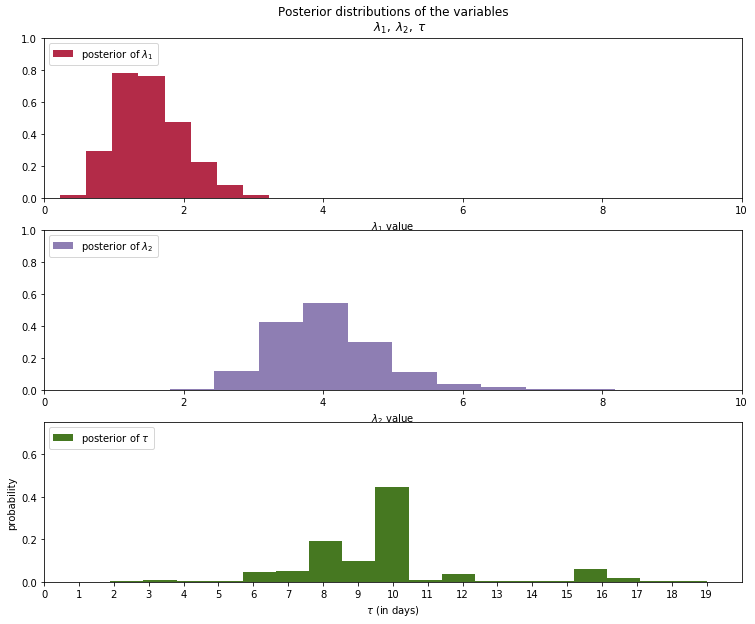

In [43]:
figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=20, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([0, 10])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=20, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([0, 10])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=size, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(size))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([0,20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability")


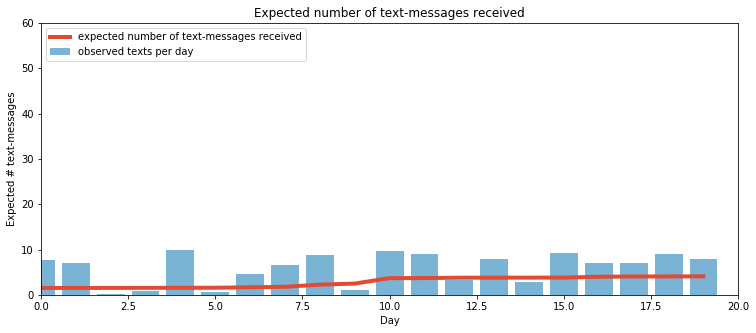

In [50]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(size)
for day in range(0, size):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N

plt.plot(range(size), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, size)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left")


In [75]:
lambda_1_samples.mean()

1.5199718631738341

In [76]:
lambda_2_samples.mean()

4.077263840036675

In [80]:
tau_samples, tau_samples.shape

(array([10, 10,  9, ..., 10, 10, 10], dtype=int64), (20000,))